<h1 style="text-align:center;font-size:50px;" > Mercedes-Benz Greener Manufacturing </h1>

![Mercedes_Benz](Benz.PNG)

# 1.0 Business Problem

## 1.1 Description

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, passenger safety cell with crumple zone, airbags, intelligent assistance systems, 4 wheel drive, state of the art display systems, ABS, all wheel drive, electronic stability program and this list goes on.

Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

Credits: Kaggle 

__ Problem Statement __
- Tackle the curse of dimensionality. By doing this we can eliminate unimportant features that hold little or no value in predicting the output and this will indirectly truncate the testing time each car is subjected to therefore making the testing process more robust and efficient.
- Predict the time taken to pass the testing phase for each car in the test dataset. This is a regression problem which demands the use of regression models to predict the real valued outputs.

## 1.2 Sources/Useful Links

- Source : https://www.kaggle.com/c/mercedes-benz-greener-manufacturing
<br><br>____ Useful Links ____
- Discussions : 
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/35871
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/35826
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/35445
- Kaggle Winning Solution and other approaches:
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700
- https://github.com/subhadipml/Mercedes-Benz-Greener-Manufacturing
- https://github.com/sanket1012/Mercedez-Benz-Greener-Manufacturing/blob/master/Mercedez%20Benz%20Project%20Final%20Report.pdf

## 1.3 Real world/Business Objectives and Constraints

1. No strict latency concerns.
2. No requirement in terms of Interpretability.

# 2.0 Machine Learning Probelm

## 2.1 Data

### 2.1.1 Data Overview

- This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

- The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

### 2.1.2 Example Data point

ID  y	  X0  X1  X2  X3  X4  X5  X6  X8 ...	X375  X376  X377  X378	X379  X380  X382  X383	X384  X385
0  130.81  k  v	  at  a	  d   u   j	  o	 ...	0	  0	    1	   0	 0	   0	  0	   0     0     0   

## 2.2 Mapping the real world problem to an ML problem 

### 2.2.1 Type of Machine Leaning Problem 

- This is a regression problem to predict the time taken(in sec) to pass the testing phase for each car.

### 2.2.2 Performance Metric

- R2 (Coefficient of determination)

## 2.3 Train, CV and Test construction 

- Train dataset provided by kaggle will be split randomly into train & CV in the ratio 80:20 .
- Test dataset provided by kaggle will be used for predictions.

# 3.0 Exploratory Data Analysis and featurizations

### Importing all the modules

In [1]:
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle
from tqdm import tqdm
import math
import os
from collections import Counter

## 3.1 Loading train & test data

In [2]:
train_df= pd.read_csv("train.csv")
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(train_df.shape)

(4209, 378)


- There are 4209 datapoints or cars that have been subjected to testing
- There are 377 features or parts or subprocesses that were being tested

In [7]:
test_df= pd.read_csv("test.csv")
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


## 3.2 Checking for NaN values

In [14]:
# train data
nan_rows = train_df[train_df.isnull().any(axis=1)]
nan_rows

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [21]:
# test data
nan_rows = test_df[test_df.isnull().any(axis=1)]
nan_rows

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


## 3.3 Finding datatypes of columns

In [27]:
#determine the datatype of features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [39]:
#ref: https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type
#ref: https://www.geeksforgeeks.org/python-pandas-index-to_series/
d_types = train_df.columns.to_series().groupby(train_df.dtypes).groups
d_types

{dtype('int64'): Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
        ...
        'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
        'X385'],
       dtype='object', length=369),
 dtype('float64'): Index(['y'], dtype='object'),
 dtype('O'): Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')}

- It can be observed that column y is of float type
- Columns from X0 to X6 & X8 are object type and hence they are categorical features
- Rest of the columns are of integer type

## 3.4 Univariate Analysis of the target variable(y)

In [233]:
# Basic stats:
train_df.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

**Important points:**
- Min value= 72.11
- Max value= 265.32
- Mean= 100.67
- IQR= 90.82-109.01

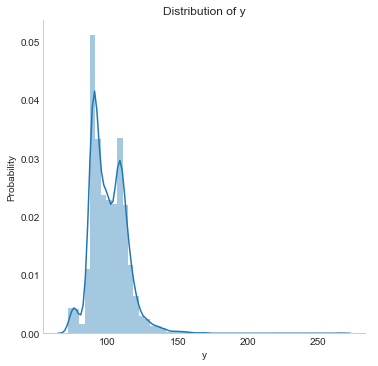

In [47]:
import warnings 
warnings.filterwarnings("ignore")

sns.FacetGrid(train_df,size=5) \
   .map(sns.distplot,'y') \
   .add_legend()
plt.ylabel('Probability')
plt.title("Distribution of y")
plt.grid()
plt.show()

- As observed form the above plot, the pdf is skewed to its right (positive skewed).
- Most of the cars have a testing time of around 90.
- There are few outliers for y>150. Let's check with a scatter plot to get more clarity.

Text(0, 0.5, 'y')

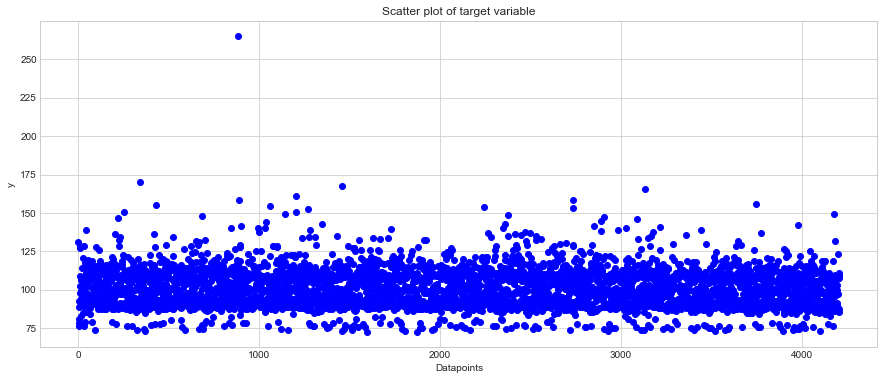

In [56]:
#scatter plot
x= range(train_df.shape[0])
y= train_df["y"].values
plt.figure(figsize=(15,6))
plt.plot(x, y, 'o', color='blue')
plt.title("Scatter plot of target variable")
plt.xlabel("Datapoints")
plt.ylabel("y")

- From the scatter plot above, it can be observed that there is one extreme outlier whose y value is 263 approx. This has to be removed.
- Also datapoints having y>150 can be considered as outliers and hence be removed.

In [57]:
train_new= train_df[train_df["y"]<150]
train_new.shape

(4194, 378)

In [58]:
print("Number of outliers removed from the original dataset:",(train_df.shape[0]-train_new.shape[0]))

Number of outliers removed from the original dataset: 15


## 3.5 Univariate Analysis of ID

In [80]:
#calculating PCC between ID & y
#ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
from scipy.stats import pearsonr
x= train_new.ID.values
y= train_new.y.values
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.049


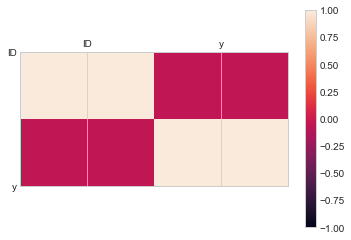

In [74]:
df_id= train_new[["ID","y"]]
correlations = df_id.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_id.columns)
ax.set_yticklabels(df_id.columns)
plt.show()

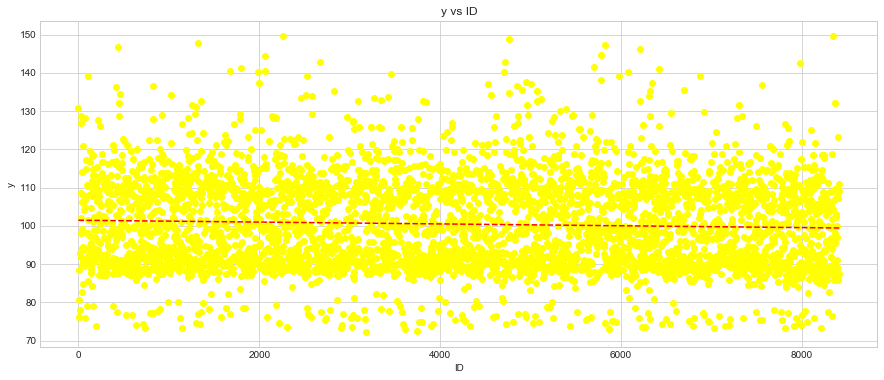

In [79]:
#scatter plot with trend line
#ref: https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas/41635626
x= train_new.ID.values
y= train_new["y"].values
plt.figure(figsize=(15,6))
plt.plot(x, y, 'o', color='yellow')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("y vs ID")
plt.xlabel("ID")
plt.ylabel("y")
plt.show()

- With a PCC of -0.049 and a decreasing trend observed from the scatter plot, it can be concluded that y is negatively correlated to ID which also gives an intuition that the cars tested later took less time

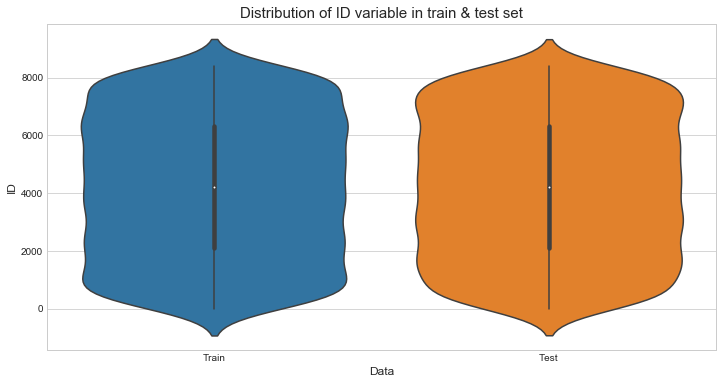

In [232]:
#compare ID of train & test using violin plot
train_vio=train_new
test_vio=test_df
train_vio['type'] = "Train"
test_vio['type'] = "Test"
combined = pd.concat([train_vio[["ID",'type']], test_vio[["ID",'type']]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x='type', y='ID', data=combined)
plt.xlabel("Data", fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.title("Distribution of ID variable in train & test set", fontsize=15)
plt.show()

- The ID values of both train & test data roughly have a similar distribution.

## 3.6 Univariate Analysis of categorical variables

In [5]:
#unique values in each of the 8 categorical columns:
columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in columns:
    unique= train[col].unique()
    print("Unique values in feature {} are:{}\n{}\n".format(col,len(unique),unique))

Unique values in feature X0 are:47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']

Unique values in feature X1 are:27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']

Unique values in feature X2 are:44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']

Unique values in feature X3 are:7
['a' 'e' 'c' 'f' 'd' 'b' 'g']

Unique values in feature X4 are:4
['d' 'b' 'c' 'a']

Unique values in feature X5 are:29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

Unique values in feature X6 are:12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'

In [6]:
#lets check the unique values of categorical features for test data
#unique values in each of the 8 categorical columns:
for col in columns:
    unique= test_df[col].unique()
    print("Unique values in feature {} are:{}\n{}\n".format(col,len(unique),unique))

Unique values in feature X0 are:49
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']

Unique values in feature X1 are:27
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']

Unique values in feature X2 are:45
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']

Unique values in feature X3 are:7
['f' 'a' 'c' 'e' 'd' 'g' 'b']

Unique values in feature X4 are:4
['d' 'b' 'a' 'c']

Unique values in feature X5 are:32
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

Unique values in feature X6 are:12
['a' 'g' 'j' 'l' 'i

**Observations:**
- Unique categories for X0,X2 & X5 are different in train & test and other columns are identical in count & values

In [18]:
# Learning how different in terms of categories are columns 'X0','X2'&'X5' in train & test

diff= ['X0','X2','X5']

for col in diff:
    a= set(sorted(list(train[col].unique())))
    b= set(sorted(list(test_df[col].unique())))
    print("Categories of {} present in train but absent in test:{}".format(col,a-b))
    print("Categories of {} present in test but absent in train:{}\n".format(col,b-a))

Categories of X0 present in train but absent in test:{'q', 'aa', 'ab', 'ac'}
Categories of X0 present in test but absent in train:{'ae', 'ag', 'bb', 'p', 'an', 'av'}

Categories of X2 present in train but absent in test:{'c', 'o', 'aa', 'l', 'ar'}
Categories of X2 present in test but absent in train:{'aj', 'w', 'ab', 'ax', 'u', 'ad'}

Categories of X5 present in train but absent in test:{'u'}
Categories of X5 present in test but absent in train:{'t', 'b', 'z', 'a'}



- Need to look after the categories present in test but not in train during target and label encoding

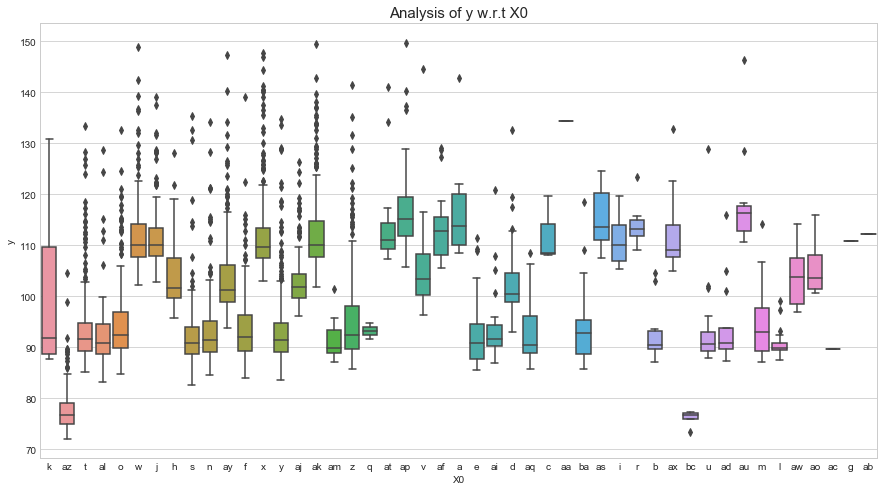

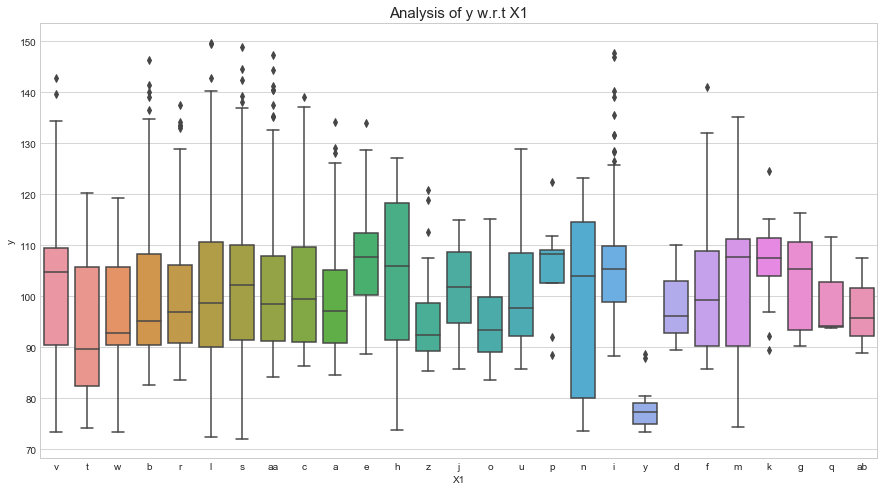

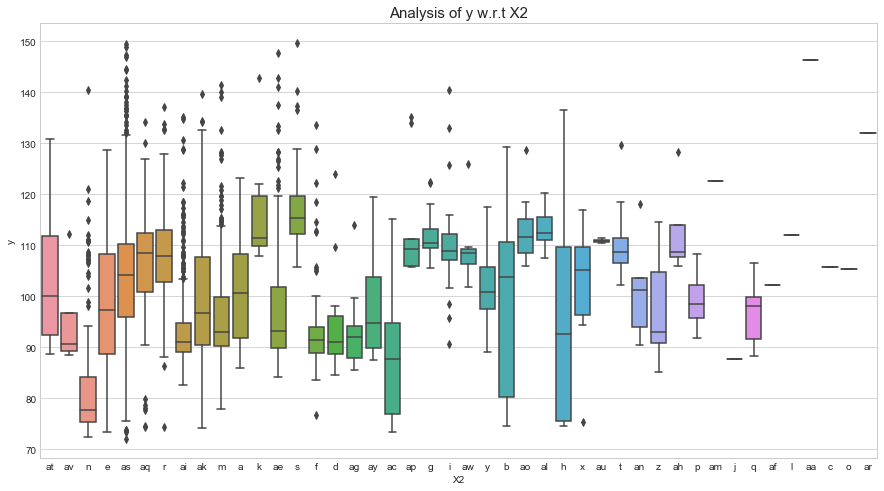

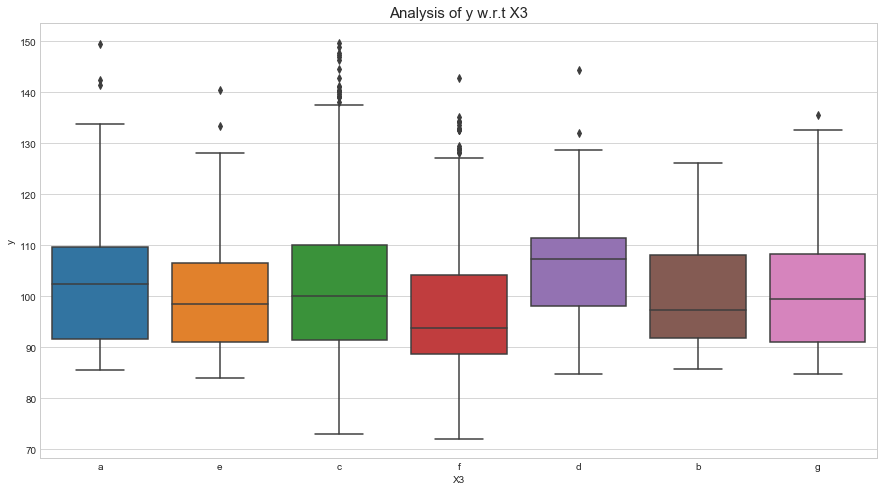

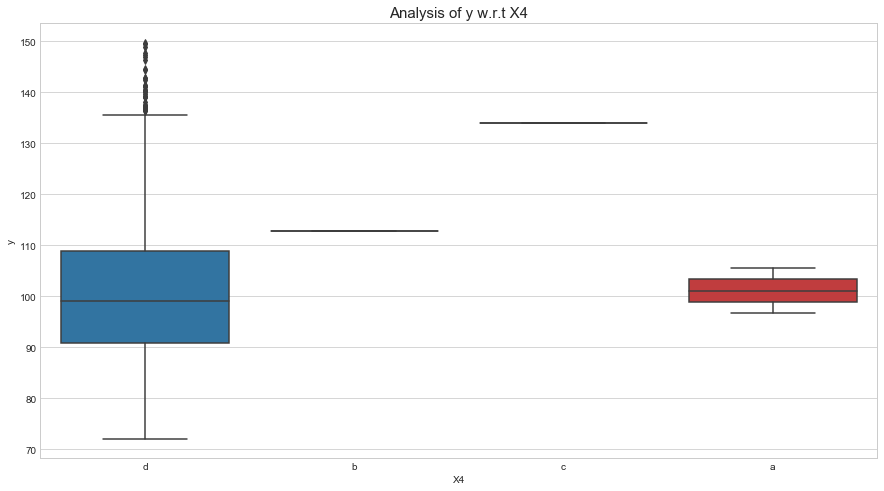

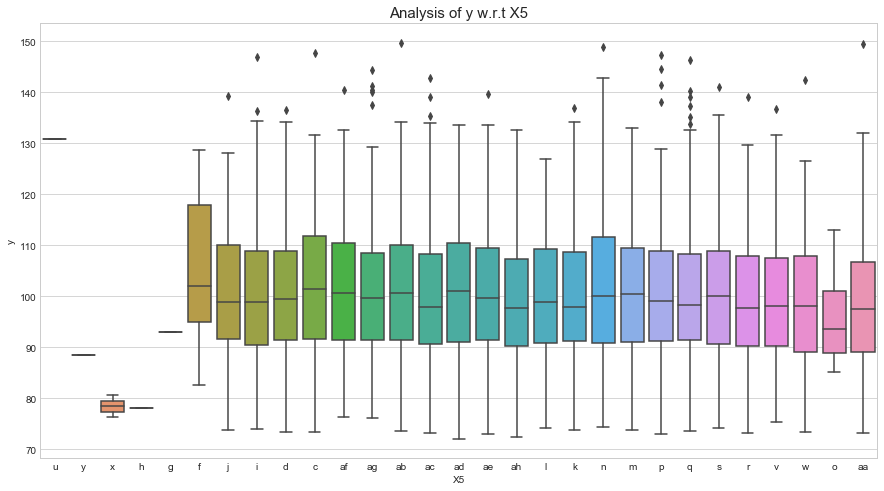

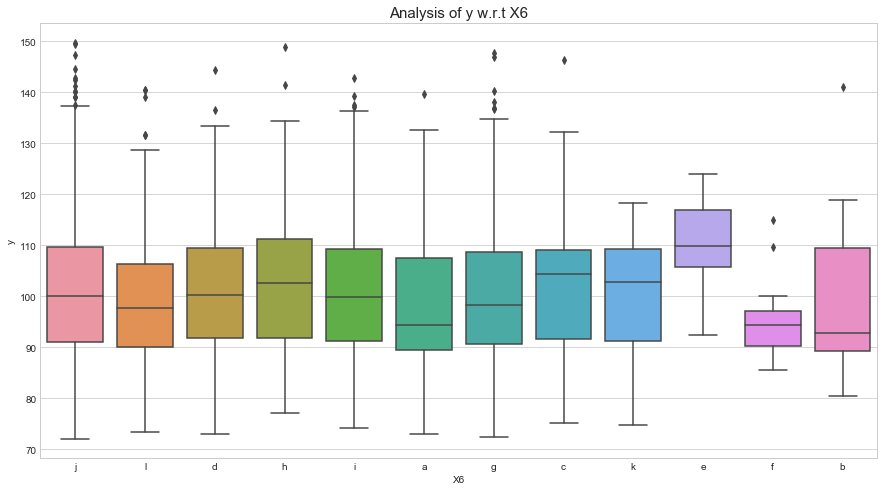

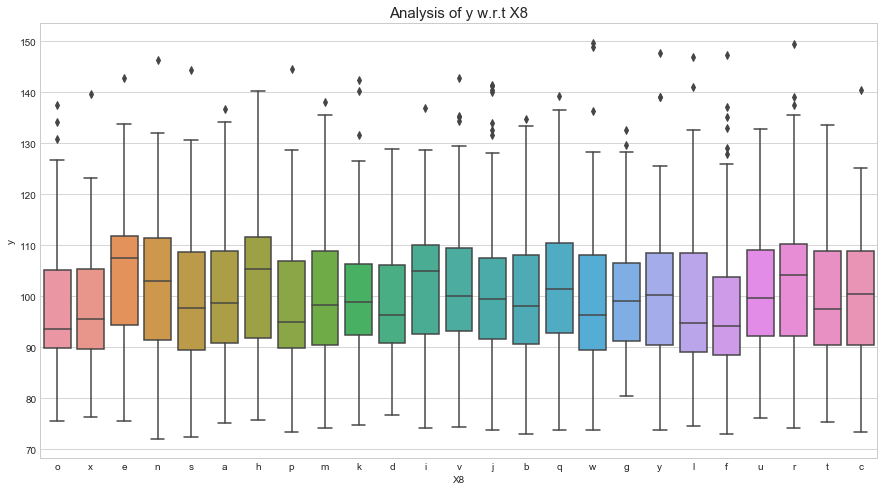

In [89]:
#box-plots
columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in columns:
    plt.figure(figsize=(15,8))
    sns.boxplot(x=col, y='y', data=train_new)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("y",fontsize=10)
    plt.title('Analysis of y w.r.t '+col,fontsize=15)
    plt.show()

**Observations:**

The plots are convoluted to observe but are self explanatory. However I will highlight few key aspects in each feature as briefly as possible:
- In X0, the least median time can be found for category az and the highest can be found for au. Intuitively, az is a sub-part/sub-assembly of the main assembly X0 which was tested quickly(on an average) compared to au. 
  Note: This intuition applies to other features as well.
- In X1,the least median time can be found for category y and the highest can be found for p.
- In X2,the least median time can be found for category n and the highest can be found for s.
- In X3,the least median time can be found for category f and the highest can be found for d.
- In X4,the least median time can be found for category d and the highest can be found for c.
- In X5,the least median time can be found for category x and the highest can be found for f.
- In X6,the least median time can be found for category f and the highest can be found for e.
- In X8,the least median time can be found for category o and the highest can be found for e.

## 3.7 Univariate Analysis of integer/binary columns

### 3.7.1 Unique values in each of the columns

- From the looks of it all the integer columns are binary i.e contains 0 or 1. Anyways lets check it out!

In [108]:
non_int=['ID','y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] #non-integer columns
unique_val= dict() #dictionary to store unique values for all the columns

for col in train_new.columns:
    if col not in non_int:
        unique_val[col]=str(list(sorted(train_new[col].unique())))

- Let's check the unique values in the unique_val dictionary

In [124]:
u= set(unique_val.values())
u

{'[0, 1]', '[0]'}

- For the sake of interpretability & readability I shall group columns/features according to their unique values

In [110]:
# Grouping dictionary keys by value
#ref: https://www.geeksforgeeks.org/python-grouping-dictionary-keys-by-value/

from collections import defaultdict
res = defaultdict(list) 
for key, val in unique_val.items(): 
    res[val].append(key)

In [122]:
for key,val in res.items():
    print("Features with {} as unique values are:\n{}".format(key,val))

Features with [0, 1] as unique values are:
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X

**Observation**
- ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347'] are the features with 0 as unique values and the variance for these features would be 0 and hence keeping them would be useless for the model. Therefore it is better to eliminate it.
- Also in the following cells, I will be eliminating features whose variance is less than 0.01 which is an experimental threshold that I would be using.

### 3.7.2 Count of 0's & 1's in columns having 0 & 1 as unique values

In [132]:
#creating lists with 0's count and 1's count
zero_count= []
one_count= []
columns= res['[0, 1]']
for col in columns:
    zero_count.append((train_new[col]==0).sum())
    one_count.append((train_new[col]==1).sum())

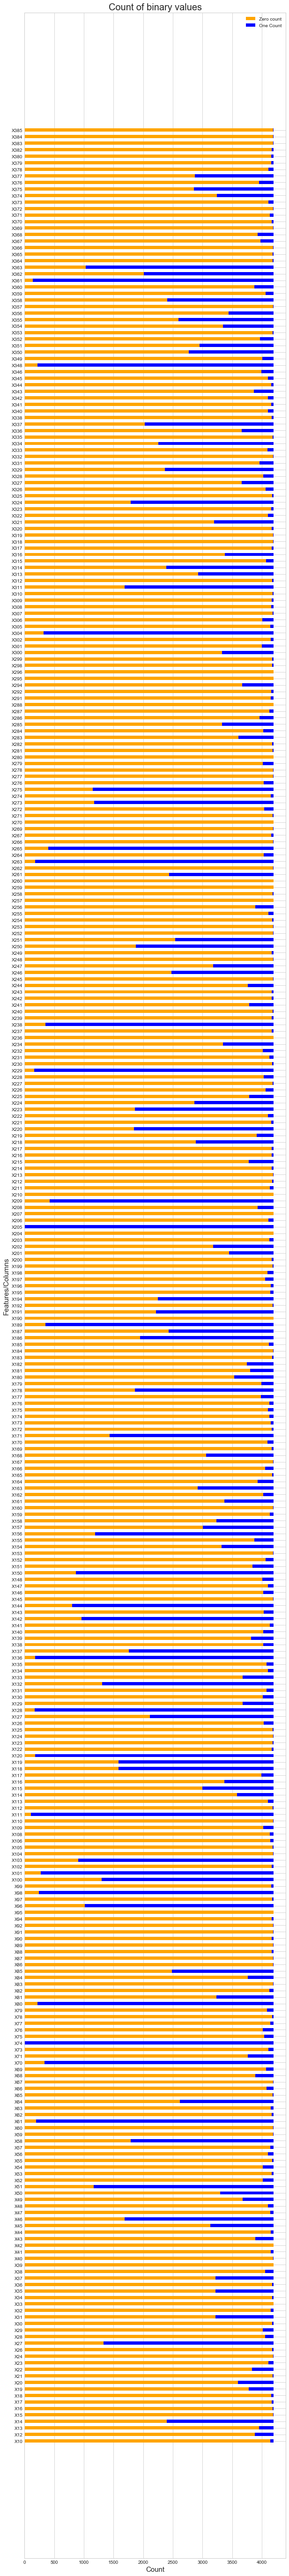

In [151]:
# Plotting stacked bar graph: Ref-https://stackoverflow.com/questions/16653815/horizontal-stacked-bar-chart-in-matplotlib

N = len(columns) #number of columns
ind = np.arange(N)  #indices required while plotting along y axis
width = 0.50

plt.figure(figsize=(10,100))
p1 = plt.barh(ind, zero_count, width, color='orange')
p2 = plt.barh(ind, one_count, width, left=zero_count, color="blue")
plt.yticks(ind, columns)
plt.legend(('Zero count', 'One Count'))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Features/Columns",fontsize=15)
plt.title('Count of binary values',fontsize=20)
plt.show()

**Observations:**
- It can be observed from the above plot that most of the integer features/columns have zeroes which occur more prominently than ones which means that a particular feature represented by 0 is tested consistently.

# 4.0 Data cleaning

In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## 4.1 Removing features having unique values as only 0

In [6]:
train_bin= train.copy()
#As discussed in 3.7.1 observation
train_bin= train_bin.drop(['y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 
                       'X289', 'X290','X293', 'X297', 'X330', 'X339', 'X347'], axis=1)
train_bin.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_bin= test_df.copy()
test_bin= test_bin.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 
                       'X289', 'X290','X293', 'X297', 'X330', 'X339', 'X347'], axis=1)
test_bin.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 4.2 Removing features whose variance is <0.01 (Threshold)

In [9]:
low_var_cols=[]
for i in test_bin.columns:
    if test_bin[i].var()<0.01: #Threshold value is experimental
        low_var_cols.append(i)

print("Number of columns having very less variance are:\n",len(low_var_cols))
print("Columns are:\n",low_var_cols)

Number of columns having very less variance are:
 133
Columns are:
 ['X15', 'X16', 'X17', 'X21', 'X24', 'X26', 'X30', 'X33', 'X34', 'X36', 'X39', 'X40', 'X42', 'X44', 'X53', 'X55', 'X59', 'X60', 'X62', 'X65', 'X67', 'X74', 'X78', 'X83', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X97', 'X99', 'X102', 'X104', 'X105', 'X110', 'X112', 'X122', 'X123', 'X124', 'X125', 'X145', 'X153', 'X160', 'X165', 'X167', 'X169', 'X172', 'X183', 'X184', 'X190', 'X192', 'X199', 'X200', 'X204', 'X205', 'X207', 'X210', 'X212', 'X213', 'X214', 'X216', 'X217', 'X221', 'X227', 'X230', 'X236', 'X237', 'X239', 'X240', 'X242', 'X243', 'X245', 'X248', 'X249', 'X252', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262', 'X266', 'X267', 'X269', 'X270', 'X271', 'X277', 'X278', 'X280', 'X281', 'X282', 'X288', 'X292', 'X295', 'X296', 'X298', 'X299', 'X302', 'X305', 'X307', 'X308', 'X309', 'X310', 'X312', 'X317', 'X318', 'X319', 'X320', 'X323', 'X325', 'X332', 'X335', 'X338', 'X341', 'X344', 'X353'

In [10]:
#dropping the above columns

train_bin = train_bin.drop(low_var_cols,axis=1)
test_bin = test_bin.drop(low_var_cols,axis=1)
print(train_bin.shape)
print(test_bin.shape)

(4194, 223)
(4209, 223)


In [11]:
train_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X367,X368,X371,X373,X374,X375,X376,X377,X378,X379
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
#checking for very highly correlated features i.e. around 1
temp= train_bin.copy()
temp= temp.drop('ID',axis=1)
ext_corr=[]
cols = list(temp.columns.values)
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        val=temp[cols[i]].corr(temp[cols[j]])
        if val>=0.99:
            ext_corr.append((cols[i],cols[j]))
print(len(ext_corr))
#print(ext_corr[:-1])

42


In [24]:
print(ext_corr[-5:])

[('X155', 'X360'), ('X202', 'X247'), ('X208', 'X368'), ('X226', 'X326'), ('X232', 'X279')]


These highly correlated features can be somewhat considered as duplicates.

## 4.3 Checking for duplicate columns

In [29]:
#ref: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    pairs=[]
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                #pairs.append((df.columns.values[x],df.columns.values[y]))
 
    return list(duplicateColumnNames)

In [30]:
train_duplicates= getDuplicateColumns(train_bin)
print("Number of duplicates in train data =",len(train_duplicates))
print("Duplicate columns are:")
print(train_duplicates)

Number of duplicates in train data = 18
Duplicate columns are:
['X134', 'X76', 'X84', 'X247', 'X232', 'X113', 'X324', 'X222', 'X244', 'X35', 'X360', 'X147', 'X146', 'X326', 'X226', 'X279', 'X119', 'X37']


## 4.4 Checking for high correlations among duplicate columns

Let us check correlations among a set of duplicate features and prepare those pairs which are highly correlated.

In [36]:
#checking for very highly correlated features i.e. around 1
temp= train_bin.copy()
temp= temp.drop('ID',axis=1)
corr_values=[]
high_corr=[]
cols = train_duplicates
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        val=temp[cols[i]].corr(temp[cols[j]])
        if val>=0.90:
            corr_values.append(val)
            high_corr.append((cols[i],cols[j]))
print("Number of correlated pairs:",len(high_corr))
print("\n")
print("Correlation values:\n",corr_values)
print("\n")
print("Feature pairs:\n",high_corr)

Number of correlated pairs: 12


Correlation values:
 [1.0, 1.0, 1.0, 0.9971247031088808, 0.9971247031088808, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Feature pairs:
 [('X134', 'X113'), ('X134', 'X222'), ('X134', 'X147'), ('X76', 'X232'), ('X76', 'X279'), ('X84', 'X244'), ('X232', 'X279'), ('X113', 'X222'), ('X113', 'X147'), ('X222', 'X147'), ('X35', 'X37'), ('X326', 'X226')]


In [37]:
# Comparing pairs and removing distinct features manually

to_drop=['X279','X76','X37','X134','X147','X222','X244','X326']
train_bin= train_bin.drop(to_drop,axis=1)
test_bin= test_bin.drop(to_drop,axis=1)
print(train_bin.shape)
print(test_bin.shape)

(4194, 215)
(4209, 215)


# 5.0 Feature Engineering & data preparation

## 5.1 Feature Engineering

Feature engineering in the form of 2 way and 3 way interactions of the variables/features could result in better model performance. I will be trying out the following 2 way & 3 way interations: (X314, X315), (X118, X119), (X47, X48),(X10, X54) and (X10, X29) as 2 way interactions & (X118, X314, X315) as 3 way interaction.
Reference: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700

- Before adding the above features let us check correlation between them & the target variable

In [38]:
#calculating PCC between ID & y
#ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
from scipy.stats import pearsonr
x= train.y.values
y1= train_bin["X314"]+train_bin["X315"].values
y2= train_bin["X118"]+train_bin["X119"].values
y3= train_bin["X47"]+train_bin["X48"].values
y4= train_bin["X118"]+train_bin["X314"]+train_bin["X315"].values
y5= train_bin["X10"]+train_bin["X54"].values
y6= train_bin["X10"]+train_bin["X29"].values
corr1, _ = pearsonr(x, y1)
corr2, _ = pearsonr(x, y2)
corr3, _ = pearsonr(x, y3)
corr4, _ = pearsonr(x, y4)
corr5, _ = pearsonr(x, y5)
corr6, _ = pearsonr(x, y6)
print('Pearsons correlation for (X314, X315) with y: %.3f' % corr1)
print('Pearsons correlation for (X118, X119) with y: %.3f' % corr2)
print('Pearsons correlation for (X47, X48) with y: %.3f' % corr3)
print('Pearsons correlation for (X118, X314, X315) with y: %.3f' % corr4)
print('Pearsons correlation for (X10, X54) with y: %.3f' % corr5)
print('Pearsons correlation for (X10, X29) with y: %.3f' % corr6)

Pearsons correlation for (X314, X315) with y: 0.699
Pearsons correlation for (X118, X119) with y: 0.291
Pearsons correlation for (X47, X48) with y: 0.243
Pearsons correlation for (X118, X314, X315) with y: 0.684
Pearsons correlation for (X10, X54) with y: -0.360
Pearsons correlation for (X10, X29) with y: -0.363


- (X314, X315) & (X118, X314, X315) seems to be very important. Anyways lets confirm this by training a XGBoost model.
- Also among 2 way interaction features, I will be considering (X10, X54) & (X10, X29) because their magnitudes are greater than correlation scores for feature combinations (X118, X119) & (X47, X48).

In [39]:
#adding newly engineered features to the train dataframe

train_bin["X314_X315"]= train_bin["X314"]+train_bin["X315"]
train_bin["X10_X54"]= train_bin["X10"]+train_bin["X54"]
train_bin["X10_X29"]= train_bin["X10"]+train_bin["X29"]
train_bin["X118_X314_X315"]= train_bin["X118"]+train_bin["X314"]+train_bin["X315"]

In [41]:
train_bin.shape

(4194, 219)

In [42]:
train_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X374,X375,X376,X377,X378,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,6,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


## 5.2 Removing highly correlated(+ve & -ve) features

In [43]:
X_corr= train_bin.copy()
X_corr= train_bin.drop(['X314_X315','X10_X54','X10_X29','X118_X314_X315'], axis=1)
X_corr.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X367,X368,X371,X373,X374,X375,X376,X377,X378,X379
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
corr_values=[] #list to store the correlated values of feature pairs
features=[] #list of correlated feature pairs 

for i in range(0,len(X_corr.columns)-1):
    for j in range(i+1,len(X_corr.columns)):
        temp_corr=X_corr[X_corr.columns[i]].corr(X_corr[X_corr.columns[j]])
        if temp_corr>=0.95 or temp_corr<=-0.95: # 95% is the threshold value
            features.append((X_corr.columns[i],X_corr.columns[j]))
            corr_values.append(temp_corr)
print("Number of pairs of extremely correlated features:\n",len(corr_values))
print("Correlation values are:\n{}\n".format(corr_values))
print("Pairs of features are:",features)

Number of pairs of extremely correlated features:
 63
Correlation values are:
[0.9946771070439342, 0.9971247031088808, -0.9971247031088808, 0.9648413386410916, 1.0, -1.0, 0.9648408939580227, 1.0, 1.0, 0.9840544130049858, 0.9977888851113587, -0.9557434679384933, -1.0, -1.0, 0.9679831714512914, 0.9971247031088808, -0.9971247031088808, 0.9620666899352026, 0.9859289752165855, 1.0, 0.9557434679384932, -0.963330132336009, 0.9999999999999998, 0.992883533669104, 0.9884237028691648, 0.983500761957513, 0.9840544130049858, 0.9999999999999999, 0.9511039203196862, 0.9511039203196862, 0.993710978386211, -1.0, -0.9679831714512914, -0.9971247031088808, 0.9971247031088808, -0.9620666899352026, 0.9859289752165855, 0.9939219558941387, 1.0, 0.9939219558941387, -1.0, 1.0, 1.0, -1.0, 0.9648413386410916, -0.9648413386410916, 0.9571020171597314, 0.9841141702127958, 0.9519877302458076, -0.9999999999999999, 0.9689188050447414, -0.9689188050447414, 0.9999999999999999, 0.9939492190401003, -0.9875330640747707, -1.

- In the pairs of features above lot of features are repeated and hence it is kinda tricky to remove these manually
- In order to simplify this operation I created an array booler having only 0's & 1's and it helps in keeping a track of the features that needs to be dropped

In [45]:
booler = np.ones(400) #array to keep a track of the features that needs to be dropped
corr_cols=[] #list storing the features to be dropped
for i in features:
    if booler[int(i[1][1:])]==1: #this expression will check for the 2nd term in the tuple
        booler[int(i[1][1:])]=0
        corr_cols.append(i[1])
    elif booler[int(i[0][1:])]==1: #this expression will check for the 1st term in the tuple in case the value in booler is already zero
        booler[int(i[0][1:])]=0
        corr_cols.append(i[0])

In [46]:
print("Finally, number of columns to be removed:",len(corr_cols))
print("Columns are:\n",corr_cols)

Finally, number of columns to be removed: 42
Columns are:
 ['X215', 'X54', 'X136', 'X162', 'X232', 'X263', 'X328', 'X35', 'X113', 'X198', 'X129', 'X61', 'X120', 'X137', 'X324', 'X111', 'X84', 'X348', 'X363', 'X371', 'X119', 'X311', 'X264', 'X130', 'X140', 'X146', 'X158', 'X226', 'X360', 'X157', 'X250', 'X378', 'X194', 'X362', 'X247', 'X368', 'X229', 'X358', 'X314', 'X352', 'X367', 'X337']


In [47]:
#dropping the correlated columns from train
train_bin = train_bin.drop(corr_cols,axis=1)
print(train_bin.shape)

(4194, 177)


In [48]:
train_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,6,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### 5.2.1 Updating the test dataframe

In [55]:
test_bin["X314_X315"]= test_bin["X314"]+test_bin["X315"]
test_bin["X10_X54"]= test_bin["X10"]+test_bin["X54"]
test_bin["X10_X29"]= test_bin["X10"]+test_bin["X29"]
test_bin["X118_X314_X315"]= test_bin["X118"]+test_bin["X314"]+test_bin["X315"]

In [56]:
#dropping the correlated columns from test
test_bin = test_bin.drop(corr_cols,axis=1)
print(test_bin.shape)

(4209, 177)


In [57]:
test_bin.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X373,X374,X375,X376,X377,X379,X314_X315,X10_X54,X10_X29,X118_X314_X315
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,2


**So finally after all these variance & correlation checks, I managed to reduce the number of features(integer/binary) from 368 to 176 (engineered features & ID excluded) which is about 47.8% reduction.**

In [58]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## 5.3 Preparing final data

In [59]:
#preparing final data matrix by adding categorical features to the above dataframe

X1= train_bin.copy() #final train data with target variable
cat=['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8','y']
for i in cat:
    X1[i]= train[i].values
print(X1.shape)
X1.head()

(4194, 186)


,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8,y
0,0,0,0,1,0,1,0,0,0,0,...,1,k,v,at,a,d,u,j,o,130.81
1,6,0,0,0,0,1,0,0,0,0,...,1,k,t,av,e,d,y,l,o,88.53
2,7,0,0,0,0,0,0,0,0,0,...,0,az,w,n,c,d,x,j,x,76.26
3,9,0,0,0,0,0,0,0,0,0,...,0,az,t,n,f,d,x,l,e,80.62
4,13,0,0,0,0,0,0,0,0,0,...,0,az,v,n,f,d,h,d,n,78.02


In [63]:
X2= test_bin.copy()
cat=['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'] 
for i in cat:
    X2[i]= test_df[i].values
print(X2.shape)
X2.head()

(4209, 185)


,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,1,0,az,v,n,f,d,t,a,w
1,2,0,0,0,0,0,1,0,0,0,...,0,1,t,b,ai,a,d,b,g,y
2,3,0,0,0,1,0,0,0,0,0,...,1,0,az,v,as,f,d,a,j,j
3,4,0,0,0,0,0,0,0,0,0,...,1,0,az,l,n,f,d,z,l,n
4,5,0,0,0,1,0,0,0,0,0,...,0,2,w,s,as,c,d,y,i,m


In [64]:
#saving final train & test data
X1.to_csv("final_train_data.csv")
X2.to_csv("final_test_data.csv")

# 6.0 Splitting the train data into train & CV

In [2]:
train= pd.read_csv("final_train_data.csv", index_col=0)
test= pd.read_csv("final_test_data.csv", index_col=0)

In [3]:
train.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8,y
0,0,0,0,1,0,1,0,0,0,0,...,1,k,v,at,a,d,u,j,o,130.81
1,6,0,0,0,0,1,0,0,0,0,...,1,k,t,av,e,d,y,l,o,88.53
2,7,0,0,0,0,0,0,0,0,0,...,0,az,w,n,c,d,x,j,x,76.26
3,9,0,0,0,0,0,0,0,0,0,...,0,az,t,n,f,d,x,l,e,80.62
4,13,0,0,0,0,0,0,0,0,0,...,0,az,v,n,f,d,h,d,n,78.02


In [4]:
test.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,1,0,az,v,n,f,d,t,a,w
1,2,0,0,0,0,0,1,0,0,0,...,0,1,t,b,ai,a,d,b,g,y
2,3,0,0,0,1,0,0,0,0,0,...,1,0,az,v,as,f,d,a,j,j
3,4,0,0,0,0,0,0,0,0,0,...,1,0,az,l,n,f,d,z,l,n
4,5,0,0,0,1,0,0,0,0,0,...,0,2,w,s,as,c,d,y,i,m


In [5]:
#preparing data to split
y = train['y']
X = train.drop(['y'], axis=1)
print(X.shape)
print(test.shape)

(4194, 185)
(4209, 185)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)
print("Shape of train data:",X_train.shape)
print("Shape of cv data:",X_cv.shape)

Shape of train data: (3355, 185)
Shape of cv data: (839, 185)


# 7.0 Check for feature importance(only integer columns)

## 7.1 XGBoost model

In [70]:
#check if the newly added features are important or not
check_y= y_train
check_x= X_train.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'], axis=1) #dropping all categorical features

In [71]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model1 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.01,0.02,0.03,0.05,0.1,0.2],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.8, 0.9],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [100, 200, 300, 500, 800, 1000, 1200]}
rs1 = RandomizedSearchCV(model1, parameters, scoring = 'r2',n_jobs = -1)
rs1.fit(check_x, check_y)

[15:54:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          ran...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
 

In [72]:
rs1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [73]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
model2 = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.7,
 colsample_bytree=0.5,
 gamma=0,
 max_depth=4,
 n_estimators=800,n_jobs = -1)
model2.fit(check_x, check_y)

[15:55:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

## 7.2 Important features

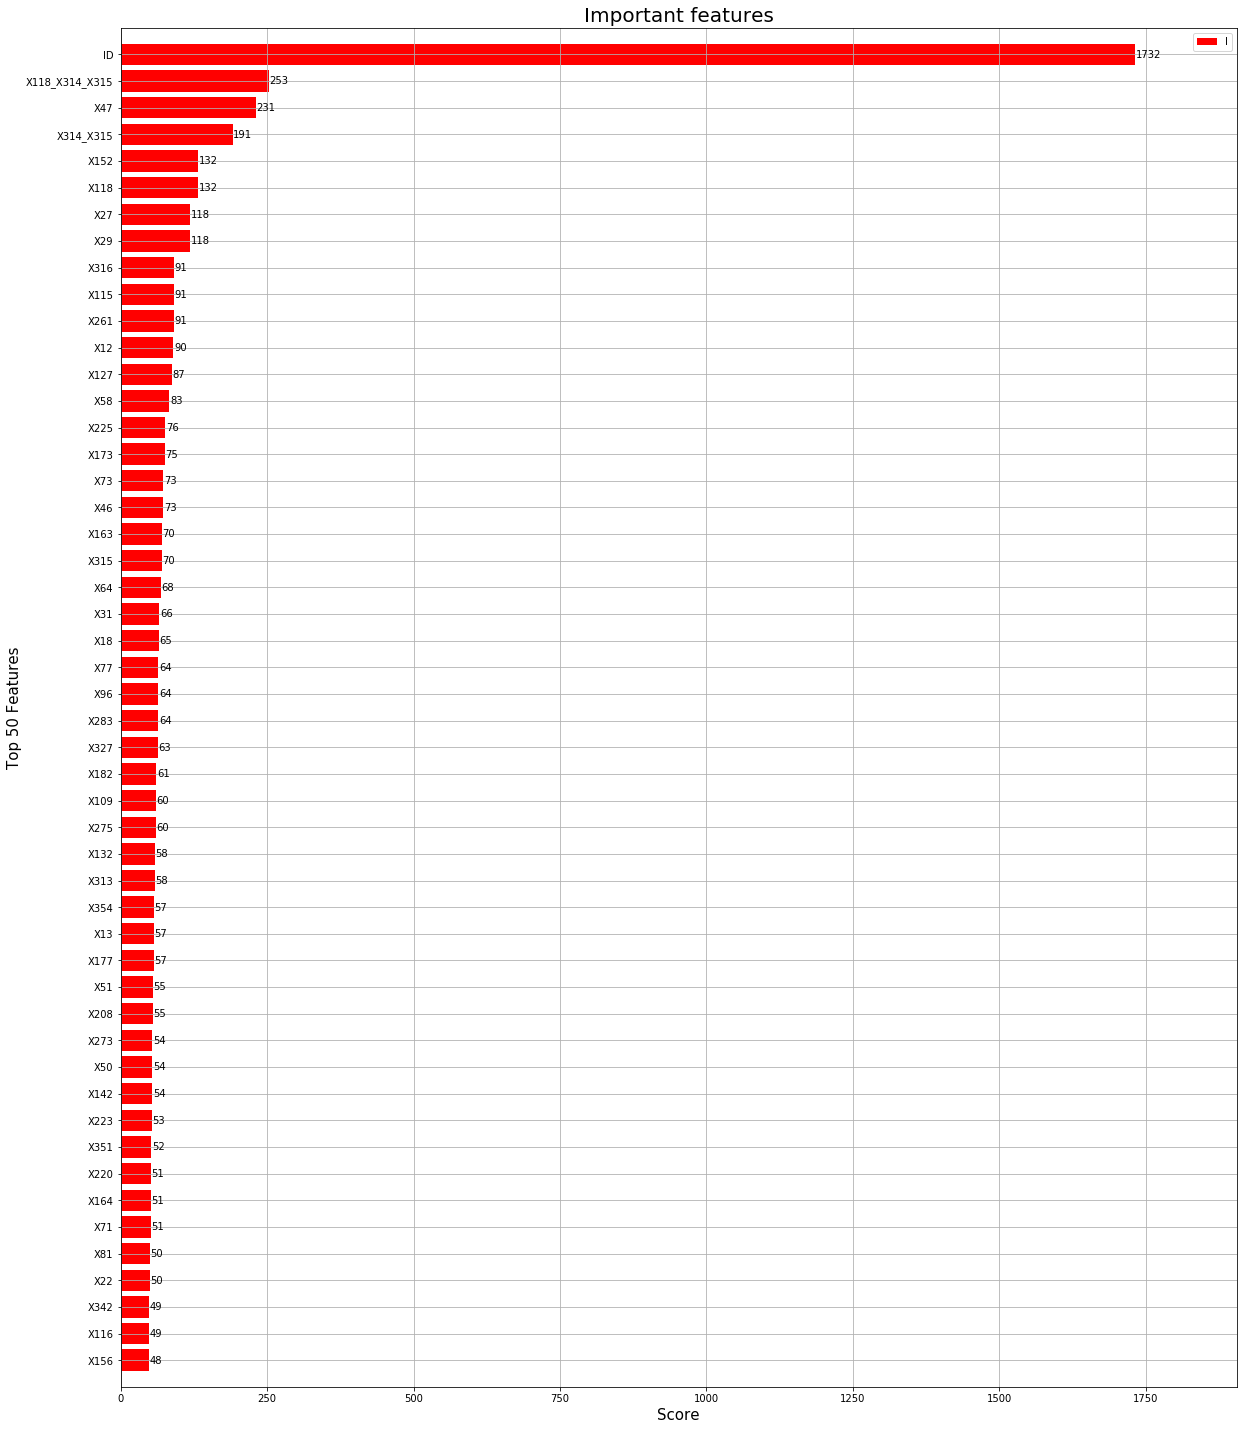

In [74]:
fig, ax = plt.subplots(figsize=(20,25))
xgb.plot_importance(model2, max_num_features=50, height=0.8, ax=ax, color = 'red')
plt.legend(('Importance score'))
plt.xlabel("Score",fontsize=15)
plt.ylabel("Top 50 Features",fontsize=15)
plt.title('Important features',fontsize=20)
plt.show()

In [75]:
#feature importances
import operator

# dictionary of feature importance from the XGboost regressor with key as features & values as importance value
imp_dict=model2.get_booster().get_score(importance_type='weight') 

#sorting the dictionary in descending order of values
#ref:https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php
sorted_dict = dict( sorted(imp_dict.items(), key=operator.itemgetter(1),reverse=True))

import itertools
# Get first N items in dictionary
#https://www.geeksforgeeks.org/python-get-first-n-keyvalue-pairs-in-given-dictionary/

top_100 = dict(itertools.islice(sorted_dict.items(), 100))
print(top_100)

{'ID': 1732, 'X118_X314_X315': 253, 'X47': 231, 'X314_X315': 191, 'X118': 132, 'X152': 132, 'X29': 118, 'X27': 118, 'X261': 91, 'X115': 91, 'X316': 91, 'X12': 90, 'X127': 87, 'X58': 83, 'X225': 76, 'X173': 75, 'X46': 73, 'X73': 73, 'X315': 70, 'X163': 70, 'X64': 68, 'X31': 66, 'X18': 65, 'X283': 64, 'X96': 64, 'X77': 64, 'X327': 63, 'X182': 61, 'X275': 60, 'X109': 60, 'X313': 58, 'X132': 58, 'X177': 57, 'X13': 57, 'X354': 57, 'X208': 55, 'X51': 55, 'X142': 54, 'X50': 54, 'X273': 54, 'X223': 53, 'X351': 52, 'X71': 51, 'X164': 51, 'X220': 51, 'X22': 50, 'X81': 50, 'X116': 49, 'X342': 49, 'X156': 48, 'X189': 47, 'X218': 47, 'X203': 47, 'X100': 46, 'X151': 45, 'X20': 45, 'X117': 44, 'X14': 44, 'X19': 44, 'X355': 44, 'X224': 44, 'X340': 43, 'X350': 43, 'X174': 42, 'X70': 42, 'X377': 42, 'X359': 41, 'X321': 41, 'X49': 40, 'X131': 40, 'X196': 40, 'X181': 40, 'X329': 39, 'X45': 39, 'X176': 38, 'X375': 37, 'X98': 36, 'X28': 35, 'X38': 34, 'X286': 34, 'X168': 34, 'X68': 34, 'X336': 33, 'X150': 3

In [76]:
len(imp_dict)

177

**Observations:**

- 'X118_X314_X315'& 'X314_X315' being in the top 50 important features turned out to be very useful. BAM! Feature engg was a success.
- 'X10_X29' & 'X10_X54' were not in the top 50, but still I would retain it for modeling.

# 8.0 Utility functions[These will be used throughout]

In [7]:
def one_hot_encoding(column,train,cv,test):
    ''' Function to encode categorical features'''
    
    vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b") #https://datascience.stackexchange.com/questions/29352/sklearn-countvectorizer-token-pattern-skip-token-if-pattern-match
    vectorizer.fit(train[column].values) # fit has to happen only on train data
    train_ohe = vectorizer.transform(train[column].values)
    cv_ohe = vectorizer.transform(cv[column].values)
    test_ohe = vectorizer.transform(test[column].values)
    return train_ohe,cv_ohe,test_ohe,print("Shape of matrix for column {} afer vectorization:".format(column)),print(train_ohe.shape,cv_ohe.shape,test_ohe.shape)

In [8]:
def score(y_true, y_pred):
    ''' Function to calculate R2 score'''
    
    return r2_score(y_true, y_pred)

**My approaches towards modelling will be based on the encoding method of categorical features & dimensionality reduction technique with integer columns retained as is.**

<h1 style="text-align:center;font-size:40px;" > Approach-1 </h1>

**In this approach I will be encoding categorical features using one hot encoding and I will be trying out different models on the sparse data.**

# 1.0 One hot encoding of categorical features

X_train, X_cv & test are already generated during splitting of data.

In [9]:
tr_X0_ohe, cv_X0_ohe, ts_X0_ohe,a,b= one_hot_encoding("X0",X_train,X_cv,test)
tr_X1_ohe, cv_X1_ohe, ts_X1_ohe,a,b= one_hot_encoding("X1",X_train,X_cv,test)
tr_X2_ohe, cv_X2_ohe, ts_X2_ohe,a,b= one_hot_encoding("X2",X_train,X_cv,test)
tr_X3_ohe, cv_X3_ohe, ts_X3_ohe,a,b= one_hot_encoding("X3",X_train,X_cv,test)
tr_X4_ohe, cv_X4_ohe, ts_X4_ohe,a,b= one_hot_encoding("X4",X_train,X_cv,test)
tr_X5_ohe, cv_X5_ohe, ts_X5_ohe,a,b= one_hot_encoding("X5",X_train,X_cv,test)
tr_X6_ohe, cv_X6_ohe, ts_X6_ohe,a,b= one_hot_encoding("X6",X_train,X_cv,test)
tr_X8_ohe, cv_X8_ohe, ts_X8_ohe,a,b= one_hot_encoding("X8",X_train,X_cv,test)

Shape of matrix for column X0 afer vectorization:
(3355, 45) (839, 45) (4209, 45)
Shape of matrix for column X1 afer vectorization:
(3355, 27) (839, 27) (4209, 27)
Shape of matrix for column X2 afer vectorization:
(3355, 40) (839, 40) (4209, 40)
Shape of matrix for column X3 afer vectorization:
(3355, 7) (839, 7) (4209, 7)
Shape of matrix for column X4 afer vectorization:
(3355, 3) (839, 3) (4209, 3)
Shape of matrix for column X5 afer vectorization:
(3355, 29) (839, 29) (4209, 29)
Shape of matrix for column X6 afer vectorization:
(3355, 12) (839, 12) (4209, 12)
Shape of matrix for column X8 afer vectorization:
(3355, 25) (839, 25) (4209, 25)


In [10]:
#Considering the remaining 175 features
tr_rem= X_train.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'],axis=1).values
cv_rem= X_cv.drop(['X0', 'X1', 'X2', 'X3','X4', 'X5', 'X6', 'X8'],axis=1).values
ts_rem= test.drop(['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8'],axis=1).values
print(tr_rem.shape,cv_rem.shape,ts_rem.shape)

(3355, 177) (839, 177) (4209, 177)


## 1.1 Combining categorical & integer features 

In [11]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_ohe = hstack((tr_X0_ohe,tr_X1_ohe,tr_X2_ohe,tr_X3_ohe,tr_X4_ohe,tr_X5_ohe,tr_X6_ohe,tr_X8_ohe,tr_rem)).tocsr()

X_cv_ohe = hstack((cv_X0_ohe,cv_X1_ohe,cv_X2_ohe,cv_X3_ohe,cv_X4_ohe,cv_X5_ohe,cv_X6_ohe,cv_X8_ohe,cv_rem)).tocsr()

X_test_ohe = hstack((ts_X0_ohe,ts_X1_ohe,ts_X2_ohe,ts_X3_ohe,ts_X4_ohe,ts_X5_ohe,ts_X6_ohe,ts_X8_ohe,ts_rem)).tocsr()

print("Final Data Matrix")
print(X_tr_ohe.shape, y_train.shape)
print(X_cv_ohe.shape, y_cv.shape)
print(X_test_ohe.shape)

Final Data Matrix
(3355, 365) (3355,)
(839, 365) (839,)
(4209, 365)


## 2.0 Models

**Normalizing data for linear and SVR models**

In [13]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler() #MinMaxScaler does not operate on sparse matrices
X_tr_norm = scaler.fit_transform(X_tr_ohe)
X_cv_norm = scaler.transform(X_cv_ohe)
X_test_norm = scaler.transform(X_test_ohe)
print(X_tr_norm.shape)
print(X_cv_norm.shape)
print(X_test_norm.shape)

(3355, 365)
(839, 365)
(4209, 365)


## 2.1 Linear regression with hyperparameter tuning

In [16]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr= LinearRegression(n_jobs=-1)
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
grid = GridSearchCV(lr, parameters, scoring='r2', n_jobs=-1)
grid.fit(X_tr_norm, y_train.values)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=-1, normalize=False),
             iid='warn', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [17]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [18]:
lr_reg = LinearRegression(fit_intercept= True, normalize= True, n_jobs = -1)
lr_reg.fit(X_tr_norm, y_train.values)

y_pred_cv_lr = lr_reg.predict(X_cv_norm)

y_pred_train_lr = lr_reg.predict(X_tr_norm)

train_score_lr=score(y_train.values, y_pred_train_lr)
cv_score_lr=score(y_cv.values, y_pred_cv_lr)
print("Train score:",round(train_score_lr,4))
print("Cross validation score:",round(cv_score_lr,4))

Train score: 0.6659
Cross validation score: 0.6281


In [19]:
y_pred_test_lr = lr_reg.predict(X_test_norm)
y_pred_test_lr

array([ 67.27865238,  95.91336739,  73.76040087, ...,  92.6255186 ,
       109.48671927,  91.00451061])

In [20]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_lr
submission.to_csv('Predictions_LR_OHE.csv', index=False)

In [21]:
submission.head(10)

,ID,y
0,1,67.278652
1,2,95.913367
2,3,73.760401
3,4,69.108009
4,5,106.129797
5,8,101.086508
6,10,120.069767
7,11,87.549346
8,12,110.704260
9,14,89.455761


#### With this submission I got a Private R2 score of 0.51398  & public R2 score of 0.52360.

## 2.2 KNN regressor with hyperparameter tuning

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

nn= KNeighborsRegressor(n_jobs=-1)
parameters = {'n_neighbors':[3, 15, 25, 50, 100], 'metric':['minkowski','euclidean','manhattan']}
grid1 = GridSearchCV(nn, parameters, scoring='r2', n_jobs=-1)
grid1.fit(X_tr_norm, y_train.values)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=-1,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 15, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [23]:
grid1.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                    weights='uniform')

In [24]:
knn= KNeighborsRegressor(n_neighbors=15,metric='manhattan',n_jobs=-1)
knn.fit(X_tr_norm, y_train.values)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                    weights='uniform')

In [25]:
y_pred_cv_knn = knn.predict(X_cv_norm)

y_pred_train_knn = knn.predict(X_tr_norm)

train_score_knn=score(y_train.values, y_pred_train_knn)
cv_score_knn=score(y_cv.values, y_pred_cv_knn)
print("Train score:",round(train_score_knn,4))
print("Cross validation score:",round(cv_score_knn,4))

Train score: 0.5952
Cross validation score: 0.5839


In [26]:
y_pred_test_knn = knn.predict(X_test_norm)
y_pred_test_knn

array([ 78.06133333,  92.486     ,  78.01466667, ...,  96.56933333,
       111.98266667,  91.60733333])

In [27]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_knn
submission.to_csv('Predictions_KNN_OHE.csv', index=False)

In [28]:
submission.head(10)

,ID,y
0,1,78.061333
1,2,92.486000
2,3,78.014667
3,4,78.334667
4,5,112.676000
5,8,92.560667
6,10,104.105333
7,11,99.016000
8,12,117.516000
9,14,93.364667


#### With this submission I got a Private R2 score of 0.47784  & public R2 score of 0.49714.

## 2.3 SVR with hyperparameter tuning

In [29]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

clf= SVR()
parameters = {'C':[1, 10, 100, 1000]} # rbf is the default kernel here
grid2 = GridSearchCV(clf, parameters, scoring='r2', n_jobs=-1)
grid2.fit(X_tr_norm, y_train.values)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [30]:
grid2.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
sv= SVR(C=100)
sv.fit(X_tr_norm, y_train)

y_pred_cv_svr = sv.predict(X_cv_norm)

y_pred_train_svr = sv.predict(X_tr_norm)

train_score_svr=score(y_train, y_pred_train_svr)
cv_score_svr=score(y_cv, y_pred_cv_svr)
print("Train score:",round(train_score_svr,4))
print("Cross validation score:",round(cv_score_svr,4))

Train score: 0.6248
Cross validation score: 0.6308


- The CV score looks interesting and the overfitting issue is also less compared to linear regression & KNN regressor. So let me check how this model performs with test data.

In [32]:
y_pred_test_svr = sv.predict(X_test_norm)
y_pred_test_svr

array([ 79.36785035,  91.78564557,  78.32998707, ...,  90.90155118,
       108.14147815,  88.73258898])

In [33]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_svr
submission.to_csv('Predictions_svr_OHE_exp6.csv', index=False)

In [34]:
submission.head(10)

,ID,y
0,1,79.367850
1,2,91.785646
2,3,78.329987
3,4,80.674599
4,5,112.029205
5,8,91.876450
6,10,107.996430
7,11,93.204263
8,12,117.204774
9,14,93.504324


In [35]:
submission.shape

(4209, 2)

#### With this submission I got a Private R2 score of 0.50506  & public R2 score of 0.51859.

## 2.4 Random forest with hyperparameter tuning

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],'min_samples_leaf':[1, 10, 100],'min_samples_split' : [3,5,7,8],
              'max_depth' : [2, 3, 4, 5, 6], 'n_estimators':[80, 100, 200, 300, 500, 1000, 1200]}
rs = RandomizedSearchCV(rf, parameters, scoring='r2',n_jobs=-1)
rs.fit(X_tr_ohe, y_train.values)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_...e

In [37]:
rs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [38]:
rfb = RandomForestRegressor(max_features='sqrt',min_samples_leaf=1,min_samples_split=8,n_estimators=100, max_depth=6,
                              n_jobs=-1)
rfb.fit(X_tr_ohe, y_train.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [39]:
y_pred_cv_rf = rfb.predict(X_cv_ohe)

y_pred_train_rf = rfb.predict(X_tr_ohe)

train_score_rf=score(y_train.values, y_pred_train_rf)
cv_score_rf=score(y_cv.values, y_pred_cv_rf)
print("Train score:",round(train_score_rf,4))
print("Cross validation score:",round(cv_score_rf,4))

Train score: 0.6053
Cross validation score: 0.6261


In [40]:
y_pred_test_rf = rfb.predict(X_test_ohe)
y_pred_test_rf

array([ 79.68949481,  95.28237829,  80.30021152, ...,  95.41625976,
       110.43764224,  94.49660038])

In [41]:
y_pred_test_rf

array([ 79.68949481,  95.28237829,  80.30021152, ...,  95.41625976,
       110.43764224,  94.49660038])

In [42]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test_rf
submission.to_csv('Predictions_RF_OHE_exp6.csv', index=False)

In [43]:
submission.head(10)

,ID,y
0,1,79.689495
1,2,95.282378
2,3,80.300212
3,4,79.713469
4,5,109.796058
5,8,95.211581
6,10,109.242372
7,11,96.715800
8,12,116.638620
9,14,96.628367


#### With this submission I got a Private R2 score of 0.52089  & public R2 score of 0.52742.

## 2.5 XGBoost regressor with hyperparameter tuning

In [89]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model3 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80,90,100,150,200,250,300, 500, 800, 1000]}
rs3 = RandomizedSearchCV(model3, parameters, scoring = 'r2',n_jobs=-1)
rs3.fit(X_tr_ohe, y_train.values)

[16:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          ran...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                             0.9],
                                        '

In [90]:
rs3.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=15,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [115]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
model4 = xgb.XGBRegressor(
 learning_rate =0.01,
 subsample=0.9,
 colsample_bytree=0.3,
 gamma=15,
 max_depth=2,
 n_estimators=800,n_jobs = -1)
model4.fit(X_tr_ohe, y_train.values)

[16:21:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=15,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [116]:
y_pred_cv = model4.predict(X_cv_ohe)
y_pred_train = model4.predict(X_tr_ohe)
y_pred_test = model4.predict(X_test_ohe)

In [117]:
train_score=score(y_train.values, y_pred_train)
cv_score=score(y_cv.values, y_pred_cv)
print("Train score:",round(train_score,4))
print("Cross validation score:",round(cv_score,4))

Train score: 0.6473
Cross validation score: 0.6343


In [118]:
y_pred_test

array([ 81.4259 ,  97.74504,  81.9031 , ...,  92.47554, 110.95321,
        92.40911], dtype=float32)

In [119]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test
submission.to_csv('Predictions_xgb_OHE_2_2.csv', index=False)

In [120]:
submission.head(10)

,ID,y
0,1,81.425903
1,2,97.745041
2,3,81.903099
3,4,81.398148
4,5,113.972298
5,8,96.529991
6,10,115.068176
7,11,97.221664
8,12,119.613876
9,14,97.916573


- **I got a Private R2 score of 0.54910 & public R2 score of 0.55551.**

<h1 style="text-align:center;font-size:40px;" > Approach-2 </h1>

### Applying SVD for dimensionality reduction and check if R2 improves or not.

**Using SVD over PCA as PCA does not work  on sparse matrices and our resultant matrix is sparse because of one hot encoding.**

In [14]:
X_tr_svd= X_tr_ohe
X_cv_svd= X_cv_ohe
X_test_svd= X_test_ohe

## 1.0 SVD on data

In [15]:
#standardize the data in order to apply svd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False) #https://stackoverflow.com/questions/52008548/python-running-into-x-test-y-test-fit-errors
# Fit on training set only.
scaler.fit(X_tr_svd)
# Apply transform to both the training set and the test set.
X_tr_svd = scaler.transform(X_tr_svd)
X_cv_svd = scaler.transform(X_cv_svd)
X_test_svd = scaler.transform(X_test_svd)

In [16]:
X_tr_svd.shape

(3355, 365)

### 1.1 Determining n_components using elbow method

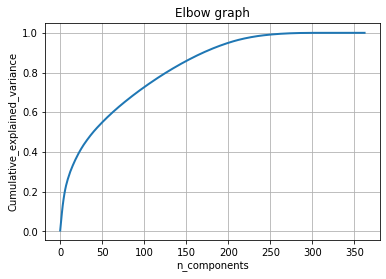

In [48]:
#elbow method

# initializing the SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=364)
svd.fit(X_tr_svd)

percentage_var_explained = svd.explained_variance_/ np.sum(svd.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the SVD spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title("Elbow graph")
plt.show()

**From the above graph it can be observed that 95% of the variance can be explained with n_components=225**

In [49]:
svd_225 = TruncatedSVD(n_components= 225)
svd_225.fit(X_tr_svd)
X_tr_svd = svd_225.transform(X_tr_svd)
X_cv_svd = svd_225.transform(X_cv_svd)
X_test_svd = svd_225.transform(X_test_svd)

In [50]:
print("Updated shapes of train, cv & test data:")
print(X_tr_svd.shape)
print(X_cv_svd.shape)
print(X_test_svd.shape)

Updated shapes of train, cv & test data:
(3355, 225)
(839, 225)
(4209, 225)


**Since XGB regressor was the best model in the previous approach, I will be training XGB regressor here & henceforth.**

## 2.0 XGBoost regressor with hyperparameter tuning

In [51]:
#XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model4 = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.01,0.02,0.05,0.1,0.5,1],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80, 90, 100, 150, 200, 250,300, 500, 800, 1000]}
rs4 = RandomizedSearchCV(model4, parameters, scoring = 'r2',n_jobs=-1)
rs4.fit(X_tr_svd, y_train.values)

[17:09:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          ran...
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                       

In [52]:
rs4.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=20,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [56]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
model5 = xgb.XGBRegressor(
 learning_rate =0.02,
 subsample=0.7,
 colsample_bytree=0.8,
 gamma=20,
 max_depth=2,
 n_estimators=500,n_jobs = -1)
model5.fit(X_tr_svd, y_train.values)

[17:10:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=20,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [57]:
y_pred_cv = model5.predict(X_cv_svd)
y_pred_train = model5.predict(X_tr_svd)
y_pred_test = model5.predict(X_test_svd)

In [58]:
train_score=score(y_train.values, y_pred_train)
cv_score=score(y_cv.values, y_pred_cv)
print("Train score:",round(train_score,4))
print("Cross validation score:",round(cv_score,4))

Train score: 0.6311
Cross validation score: 0.6003


In [59]:
y_pred_test

array([ 80.61638,  93.09882,  79.25799, ...,  94.49089, 110.37918,
        93.65836], dtype=float32)

In [60]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test
submission.to_csv('Predictions_xgb_svd_exp6.csv', index=False)

In [61]:
submission.head(10)

,ID,y
0,1,80.616379
1,2,93.098824
2,3,79.257988
3,4,79.144333
4,5,108.024719
5,8,93.306557
6,10,104.848259
7,11,95.779129
8,12,116.990997
9,14,98.194511


- **Best estimator hyperparameters were overfitting. Therefore experimented for depth =2 & n_est = 500, I got a Private R2 score of 0.49440  & public R2 score of 0.50422.**
- **Results are are not good.**

<h1 style="text-align:center;font-size:40px;" > Approach-3 </h1>

**In this approach I will be trying SelectKBest technique of dimensionality reduction on one hot encoded categorical features & integer features and check if the R2 score improves or not.**

In [21]:
print("Data Matrix")
print(X_tr_ohe.shape, y_train.shape)
print(X_cv_ohe.shape, y_cv.shape)
print(X_test_ohe.shape)

Data Matrix
(3355, 365) (3355,)
(839, 365) (839,)
(4209, 365)


In [27]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
from sklearn.feature_selection import SelectKBest,f_regression
# feature extraction
fe = SelectKBest(score_func=f_regression, k=182) #considering 50% feature reduction
X_tr_ohe_best = fe.fit_transform(X_tr_ohe, y_train)
X_cv_ohe_best = fe.transform(X_cv_ohe)
X_test_ohe_best = fe.transform(X_test_ohe)

print("Final reduced Data Matrix")
print(X_tr_ohe_best.shape, y_train.shape)
print(X_cv_ohe_best.shape, y_cv.shape)
print(X_test_ohe_best.shape)

Final reduced Data Matrix
(3355, 182) (3355,)
(839, 182) (839,)
(4209, 182)


### Hyperparameter tuning of XGBoost regressor

In [32]:
# applying XGBoost
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

model_k = XGBRegressor(n_jobs = -1)
parameters = {'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1,0.5],'subsample':[0.7, 0.8, 0.9],'colsample_bytree':[0.3, 0.5, 0.6, 0.8, 0.9],'gamma':[0,1,5,10,15,20,25,30],
          'max_depth': [2, 3, 4, 5, 6],'n_estimators': [80, 90, 100, 150, 200, 250,300, 500, 800, 1000]}
rs = RandomizedSearchCV(model_k, parameters, scoring = 'r2',n_jobs=-1)
rs.fit(X_tr_ohe_best, y_train.values)

[12:29:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          ran...
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                                       

In [33]:
rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=15,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [34]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
import xgboost as xgb
model_k = xgb.XGBRegressor(
 learning_rate =0.05,
 subsample=0.8,
 colsample_bytree=0.5,
 gamma=15,
 max_depth=2,
 n_estimators=150,n_jobs = -1)
model_k.fit(X_tr_ohe_best, y_train.values)

[12:31:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=15,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [35]:
y_pred_cv = model_k.predict(X_cv_ohe_best)
y_pred_train = model_k.predict(X_tr_ohe_best)
y_pred_test = model_k.predict(X_test_ohe_best)

In [36]:
train_score=score(y_train.values, y_pred_train)
cv_score=score(y_cv.values, y_pred_cv)
print("Train score:",round(train_score,4))
print("Cross validation score:",round(cv_score,4))

Train score: 0.6429
Cross validation score: 0.6432


In [37]:
y_pred_test

array([ 80.54896 ,  94.18076 ,  79.802925, ...,  94.64967 , 111.79481 ,
       102.35253 ], dtype=float32)

In [38]:
submission = pd.DataFrame()
submission['ID'] = test.ID.values
submission['y'] = y_pred_test
submission.to_csv('Predictions_xgb_sk_ohe.csv', index=False)

In [39]:
submission.head(10)

,ID,y
0,1,80.548958
1,2,94.180763
2,3,79.802925
3,4,80.394875
4,5,112.191460
5,8,93.843826
6,10,112.497711
7,11,94.681602
8,12,115.927361
9,14,94.815086


- **I got a Private R2 score of 0.54938 & public R2 score of 0.55583.**
- **Impressive! So, SelectKbest outperformed SVD and in fact it gave me the best score with one hot encoding approach.**

<h1 style="text-align:center;font-size:40px;" > Approach-4 </h1>

- **This approach will be similar to Approach-1 but the only difference is in encoding of categorical features where I will be implementing target encoding instead of one hot encoding.**
- **Here, I will not be splitting the train data into train & cv. I will be considering the entire train data for modelling.**
- **Also, I will be implementing the native XGBoost API instead of scikit learn version of XGBoost regressor.**

# 1.0 Target encoding of categorical features

In [40]:
train.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8,y
0,0,0,0,1,0,1,0,0,0,0,...,1,k,v,at,a,d,u,j,o,130.81
1,6,0,0,0,0,1,0,0,0,0,...,1,k,t,av,e,d,y,l,o,88.53
2,7,0,0,0,0,0,0,0,0,0,...,0,az,w,n,c,d,x,j,x,76.26
3,9,0,0,0,0,0,0,0,0,0,...,0,az,t,n,f,d,x,l,e,80.62
4,13,0,0,0,0,0,0,0,0,0,...,0,az,v,n,f,d,h,d,n,78.02


In [41]:
train_y= train.y
X_train_te= train.copy()
X_train_te= X_train_te.drop('y',axis=1)
X_test_te= test.copy()
print("Shape of train data:",X_train_te.shape)
print("Shape of test data:",X_test_te.shape)

Shape of train data: (4194, 185)
Shape of test data: (4209, 185)


In [42]:
cat= ['X0', 'X1', 'X2', 'X3','X4', 'X5', 'X6', 'X8']

In [43]:
#https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html
#https://pypi.org/project/category-encoders/
from category_encoders import *
# use target encoding to encode 8 categorical features
enc = TargetEncoder(cols=cat).fit(X_train_te, train_y)

# transform the datasets
X_train_te = enc.transform(X_train_te, train_y)
X_test_te = enc.transform(X_test_te)

In [44]:
X_train_te.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,0,1,0,1,0,0,0,0,...,0,1,99.491861,100.983086,104.193045,102.242763,100.428654,100.439938,101.015569,97.746933
1,6,0,0,0,0,1,0,0,0,0,...,0,1,99.491861,93.723226,95.743807,100.033190,100.428654,100.439938,98.487815,97.746933
2,7,0,0,0,0,0,0,0,0,0,...,1,0,78.025543,95.764808,83.369927,101.766129,100.428654,84.356695,101.015569,98.078654
3,9,0,0,0,0,0,0,0,0,0,...,1,0,78.025543,93.723226,83.369927,96.111916,100.428654,84.356695,98.487815,104.737232
4,13,0,0,0,0,0,0,0,0,0,...,1,0,78.025543,100.983086,83.369927,96.111916,100.428654,100.439938,101.174141,102.194215


In [45]:
X_test_te.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,1,0,78.025543,100.983086,83.369927,96.111916,100.428654,100.439938,97.802524,98.848615
1,2,0,0,0,0,0,1,0,0,0,...,0,1,93.538656,99.550000,93.722995,102.242763,100.428654,100.439938,99.961284,101.435086
2,3,0,0,0,1,0,0,0,0,0,...,1,0,78.025543,100.983086,103.575961,96.111916,100.428654,100.439938,101.015569,100.272428
3,4,0,0,0,0,0,0,0,0,0,...,1,0,78.025543,100.416661,83.369927,96.111916,100.428654,100.439938,98.487815,102.194215
4,5,0,0,0,1,0,0,0,0,0,...,0,2,112.151000,101.868462,103.575961,101.766129,100.428654,100.439938,101.226803,100.051364


## 1.1 Checking for NaN values if any

In [46]:
# test data
nan_rows = X_test_te[X_test_te.isnull().any(axis=1)]
nan_rows

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8


In [47]:
# train data
nan_rows = X_train_te[X_train_te.isnull().any(axis=1)]
nan_rows

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8


- **Target encoder provides an option of handle_missing='value'& handle_unknown='value' where value is mean of the target variable, we do not have to worry about NaN's**

# 2.0 XGBoost model with hyperparameter tuning

## 2.1 Hyperparameter tuning
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [13]:
import xgboost as xgb

#preparing train & test matrices
dtrain = xgb.DMatrix(X_train_te, label=train_y)
dtest = xgb.DMatrix(X_test_te)
num_boost_round = 1000


params = {
    # Parameters that we are going to tune. Below are the default values of the parameters
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

In [15]:
#Let’s see what cross-validation score we get with our current parameters:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=50
)

print(cv_results['test-rmse-mean'].min())

[13:27:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.476154800000001


In [16]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,70.691104,0.062909,70.688881,0.329249
1,49.788036,0.045937,49.786632,0.320848
2,35.265200,0.034915,35.264314,0.319898
3,25.248762,0.028411,25.256982,0.330428
4,18.431080,0.024849,18.456827,0.340102
5,13.884497,0.026920,13.973699,0.347921
6,10.940489,0.027392,11.135726,0.324649
7,9.093285,0.034705,9.413359,0.309213
8,7.995387,0.037834,8.446029,0.278169
9,7.336958,0.046580,7.942328,0.241516


### Tuning Parameters max_depth and min_child_weight

In [17]:
gridsearch_params = [(max_depth, min_child_weight)
    for max_depth in range(2,7)
    for min_child_weight in range(4,8)]
print(gridsearch_params)

[(2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 4), (4, 5), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (6, 4), (6, 5), (6, 6), (6, 7)]


In [18]:
# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=50
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=4
[13:35:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.3127104 for 17 rounds
CV with max_depth=2, min_child_weight=5
[13:35:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/sr

[13:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.443504 for 14 rounds
CV with max_depth=6, min_child_weight=7
[13:37:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:li

In [19]:
print("Best params: max_depth:{}, min_child_weight:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: max_depth:2, min_child_weight:6, RMSE: 7.309747


In [20]:
#updating the parameter dictionary
params['max_depth'] = 2
params['min_child_weight'] = 6

### Tuning Parameters subsample and colsample

In [21]:
gridsearch_params = [(subsample, colsample)
    for subsample in [i/10. for i in range(6,11)]
    for colsample in [i/10. for i in range(5,11)]]
print(gridsearch_params)

[(0.6, 0.5), (0.6, 0.6), (0.6, 0.7), (0.6, 0.8), (0.6, 0.9), (0.6, 1.0), (0.7, 0.5), (0.7, 0.6), (0.7, 0.7), (0.7, 0.8), (0.7, 0.9), (0.7, 1.0), (0.8, 0.5), (0.8, 0.6), (0.8, 0.7), (0.8, 0.8), (0.8, 0.9), (0.8, 1.0), (0.9, 0.5), (0.9, 0.6), (0.9, 0.7), (0.9, 0.8), (0.9, 0.9), (0.9, 1.0), (1.0, 0.5), (1.0, 0.6), (1.0, 0.7), (1.0, 0.8), (1.0, 0.9), (1.0, 1.0)]


In [22]:
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)

CV with subsample=1.0, colsample=1.0
[13:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.309747 for 19 rounds
CV with subsample=1.0, colsample=0.9
[13:43:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objec

[13:45:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.302944200000001 for 15 rounds
CV with subsample=0.7, colsample=0.9
[13:45:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: 

In [23]:
print("Best params: subsample:{}, colsample:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: subsample:1.0, colsample:0.7, RMSE: 7.2829278


In [24]:
#updating the parameter dictionary
params['subsample'] = 1.0
params['colsample_bytree'] = 0.7

In [25]:
params

{'max_depth': 2,
 'min_child_weight': 6,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

### Tuning learning rate: eta

In [26]:
%time
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for eta in [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.0025]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta

Wall time: 0 ns
CV with eta=0.4
[13:48:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.305766800000001 for 12 rounds
CV with eta=0.3
[13:49:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_o

In [27]:
print("Best params: eta:{}, RMSE: {}".format(best_params, min_rmse))

Best params: eta:0.3, RMSE: 7.2829278


In [28]:
#updating the parameter dictionary
params['eta'] = 0.3

In [29]:
print("Final parameter dictionary:")
params

Final parameter dictionary:


{'max_depth': 2,
 'min_child_weight': 6,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

## 2.2 XGBoost regressor
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [131]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=20,
    evals=[(dtrain, "Train")]
)

[15:29:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Train-rmse:70.6847
[1]	Train-rmse:49.779
[2]	Train-rmse:35.2563
[3]	Train-rmse:25.2465
[4]	Train-rmse:18.4461
[5]	Train-rmse:13.944
[6]	Train-rmse:11.0675
[7]	Train-rmse:9.33207
[8]	Train-rmse:8.33459
[9]	Train-rmse:7.79411
[10]	Train-rmse:7.50825
[11]	Train-rmse:7.35637
[12]	Train-rmse:7.27756
[13]	Train-rmse:7.227
[14]	Train-rmse:7.19932
[15]	Train-rmse:7.17977
[16]	Train-rmse:7.16348
[17]	Train-rmse:7.15276
[18]	Train-rmse:7.14156
[19]	Train-rmse:7.1358


In [137]:
#predicting train & test target values
y_pred_train = best_model.predict(dtrain)
y_pred_test = best_model.predict(dtest)

In [138]:
train_score=score(train_y.values, y_pred_train)
print("Train score:",round(train_score,4))

Train score: 0.6443


In [139]:
y_pred_test

array([ 82.496895,  95.62018 ,  81.34072 , ...,  91.94877 , 110.25    ,
        92.08288 ], dtype=float32)

In [140]:
submission = pd.DataFrame()
submission['ID'] = X_test_te.ID.values
submission['y'] = y_pred_test
submission.to_csv('sub.csv', index=False)

In [87]:
#saving model
best_model.save_model("TE_0.55078.model")

In [136]:
#loading model
best_model = xgb.Booster()
best_model.load_model("TE_0.55078.model")

[15:33:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


- **After experimenting with a lot of rounds, I finally got a Private R2 score of 0.55078 & public R2 score of 0.55595. This is the highest R2 score I've got by far.**
- **With this score I'm in the top 24% at 922nd position.**

<h1 style="text-align:center;font-size:40px;" > Approach-5 </h1>

**In this approach I will be trying SelectKBest technique of dimensionality reduction on target encoded features & integer features and check if the R2 score improves or not.**

In [52]:
from sklearn.feature_selection import SelectKBest,f_regression
# feature extraction
fe = SelectKBest(score_func=f_regression, k=100) #considering 55% feature reduction
X_train_te_best = fe.fit_transform(X_train_te, train_y)
X_test_te_best = fe.transform(X_test_te)

print("Final reduced Data Matrix")
print(X_train_te_best.shape, train_y.shape)
print(X_test_te_best.shape)

Final reduced Data Matrix
(4194, 100) (4194,)
(4209, 100)


# 1.0 XGBoost model with hyperparameter tuning

## 1.1 Hyperparameter tuning
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [53]:
import xgboost as xgb

#preparing train & test matrices
dtrain = xgb.DMatrix(X_train_te_best, label=train_y)
dtest = xgb.DMatrix(X_test_te_best)
num_boost_round = 1000


params = {
    # Parameters that we are going to tune. Below are the default values of the parameters
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

In [54]:
#Let’s see what cross-validation score we get with our current parameters:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=50
)

print(cv_results['test-rmse-mean'].min())

[13:06:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.415836400000001


### Tuning Parameters max_depth and min_child_weight

In [55]:
gridsearch_params = [(max_depth, min_child_weight)
    for max_depth in range(2,7)
    for min_child_weight in range(4,8)]
print(gridsearch_params)

[(2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 4), (4, 5), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (6, 4), (6, 5), (6, 6), (6, 7)]


In [56]:
# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=50
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=4
[13:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.2904501999999995 for 19 rounds
CV with max_depth=2, min_child_weight=5
[13:07:06] WARNING: C:/Jenkins/workspace/xgboost-win64_releas

[13:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.416135399999999 for 14 rounds
CV with max_depth=6, min_child_weight=7
[13:08:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:15

In [57]:
print("Best params: max_depth:{}, min_child_weight:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: max_depth:2, min_child_weight:7, RMSE: 7.2875388


In [58]:
#updating the parameter dictionary
params['max_depth'] = 2
params['min_child_weight'] = 7

### Tuning Parameters subsample and colsample

In [59]:
gridsearch_params = [(subsample, colsample)
    for subsample in [i/10. for i in range(6,11)]
    for colsample in [i/10. for i in range(5,11)]]
print(gridsearch_params)

[(0.6, 0.5), (0.6, 0.6), (0.6, 0.7), (0.6, 0.8), (0.6, 0.9), (0.6, 1.0), (0.7, 0.5), (0.7, 0.6), (0.7, 0.7), (0.7, 0.8), (0.7, 0.9), (0.7, 1.0), (0.8, 0.5), (0.8, 0.6), (0.8, 0.7), (0.8, 0.8), (0.8, 0.9), (0.8, 1.0), (0.9, 0.5), (0.9, 0.6), (0.9, 0.7), (0.9, 0.8), (0.9, 0.9), (0.9, 1.0), (1.0, 0.5), (1.0, 0.6), (1.0, 0.7), (1.0, 0.8), (1.0, 0.9), (1.0, 1.0)]


In [60]:
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)

CV with subsample=1.0, colsample=1.0
[13:09:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.2875388 for 18 rounds
CV with subsample=1.0, colsample=0.9
[13:09:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obje

[13:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.297500600000001 for 15 rounds
CV with subsample=0.7, colsample=0.9
[13:10:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: 

In [61]:
print("Best params: subsample:{}, colsample:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: subsample:1.0, colsample:0.9, RMSE: 7.2768552


In [62]:
#updating the parameter dictionary
params['subsample'] = 1.0
params['colsample_bytree'] = 0.9

In [63]:
params

{'max_depth': 2,
 'min_child_weight': 7,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.9,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

### Tuning learning rate: eta

In [64]:
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for eta in [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.0025]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta

CV with eta=0.4
[13:13:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.294961600000001 for 11 rounds
CV with eta=0.3
[13:13:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:l

In [65]:
print("Best params: eta:{}, RMSE: {}".format(best_params, min_rmse))

Best params: eta:0.3, RMSE: 7.2768552


In [66]:
#updating the parameter dictionary
params['eta'] = 0.3

In [67]:
print("Final parameter dictionary:")
params

Final parameter dictionary:


{'max_depth': 2,
 'min_child_weight': 7,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.9,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

## 1.2 XGBoost regressor
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [93]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=20,
    evals=[(dtrain, "Train")],
    early_stopping_rounds=50
)
print("Best RMSE: {:.4f} in {} rounds".format(model.best_score, model.best_iteration+1))

[13:32:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Train-rmse:70.6847
Will train until Train-rmse hasn't improved in 50 rounds.
[1]	Train-rmse:49.779
[2]	Train-rmse:35.2563
[3]	Train-rmse:25.2465
[4]	Train-rmse:18.4461
[5]	Train-rmse:13.9373
[6]	Train-rmse:11.0627
[7]	Train-rmse:9.32582
[8]	Train-rmse:8.33201
[9]	Train-rmse:7.78715
[10]	Train-rmse:7.50197
[11]	Train-rmse:7.35076
[12]	Train-rmse:7.26452
[13]	Train-rmse:7.21854
[14]	Train-rmse:7.19184
[15]	Train-rmse:7.17404
[16]	Train-rmse:7.16348
[17]	Train-rmse:7.15465
[18]	Train-rmse:7.1485
[19]	Train-rmse:7.14149
Best RMSE: 7.1415 in 20 rounds


In [94]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtrain, "Train")]
)

[13:33:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Train-rmse:70.6847
[1]	Train-rmse:49.779
[2]	Train-rmse:35.2563
[3]	Train-rmse:25.2465
[4]	Train-rmse:18.4461
[5]	Train-rmse:13.9373
[6]	Train-rmse:11.0627
[7]	Train-rmse:9.32582
[8]	Train-rmse:8.33201
[9]	Train-rmse:7.78715
[10]	Train-rmse:7.50197
[11]	Train-rmse:7.35076
[12]	Train-rmse:7.26452
[13]	Train-rmse:7.21854
[14]	Train-rmse:7.19184
[15]	Train-rmse:7.17404
[16]	Train-rmse:7.16348
[17]	Train-rmse:7.15465
[18]	Train-rmse:7.1485
[19]	Train-rmse:7.14149


In [95]:
#predicting train & test target values
y_pred_train = best_model.predict(dtrain)
y_pred_test = best_model.predict(dtest)

In [96]:
train_score=score(train_y.values, y_pred_train)
print("Train score:",round(train_score,4))

Train score: 0.6454


In [97]:
y_pred_test

array([ 78.58798 ,  93.48651 ,  79.83068 , ...,  92.18607 , 111.022675,
        92.27672 ], dtype=float32)

In [98]:
submission = pd.DataFrame()
submission['ID'] = X_test_te.ID.values
submission['y'] = y_pred_test
submission.to_csv('XGB_pred_te_kbest_3.csv', index=False)

- **In this case I got a Private R2 score of 0.54828 & public R2 score of 0.55386.**
- **Since the R2 score did not improve from 0.55078, SelectKbest approach did not work well here.**

<h1 style="text-align:center;font-size:40px;" > Approach-6 </h1>

- **This approach will be similar to Approach-4 but the only difference is in encoding of categorical features where I will be implementing label encoding instead of target encoding.**
- **Similarly to approach-4, I will not be splitting the train data into train & cv. I will be considering the entire train data for modelling and I will be implementing the native XGBoost API instead of scikit learn version of XGBoost regressor.**

In [99]:
train_y= train.y
X_train_le= train.copy()
X_train_le= X_train_le.drop('y',axis=1)
X_test_le= test.copy()
print("Shape of train data:",X_train_le.shape)
print("Shape of test data:",X_test_le.shape)

Shape of train data: (4194, 185)
Shape of test data: (4209, 185)


In [100]:
X_train_le.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,0,1,0,1,0,0,0,0,...,0,1,k,v,at,a,d,u,j,o
1,6,0,0,0,0,1,0,0,0,0,...,0,1,k,t,av,e,d,y,l,o
2,7,0,0,0,0,0,0,0,0,0,...,1,0,az,w,n,c,d,x,j,x
3,9,0,0,0,0,0,0,0,0,0,...,1,0,az,t,n,f,d,x,l,e
4,13,0,0,0,0,0,0,0,0,0,...,1,0,az,v,n,f,d,h,d,n


In [101]:
X_test_le.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,1,0,az,v,n,f,d,t,a,w
1,2,0,0,0,0,0,1,0,0,0,...,0,1,t,b,ai,a,d,b,g,y
2,3,0,0,0,1,0,0,0,0,0,...,1,0,az,v,as,f,d,a,j,j
3,4,0,0,0,0,0,0,0,0,0,...,1,0,az,l,n,f,d,z,l,n
4,5,0,0,0,1,0,0,0,0,0,...,0,2,w,s,as,c,d,y,i,m


# 1.0 Label encoding

In [102]:
#Label encoding
from sklearn import preprocessing
cat=['X0', 'X1', 'X2', 'X3','X4','X5', 'X6', 'X8']
for i in cat:
    le = preprocessing.LabelEncoder()
    if (i =='X0') or (i=='X2') or (i=='X5'): # doing this because there are lots of different categories in test that are not in train.Please refer to section 3.6 in the EDA part above.
        diff= list(set(X_test_le[i].unique())-set(X_train_le[i].unique())) #did this in order to avoid data leakage by fitting values of test directly into fit function
        le.fit(list(X_train_le[i].values)+diff) # fitting only on train data and the difference in categories between train & test as explained above
        X_train_le[i]= le.transform(list(X_train_le[i].values))
        X_test_le[i]= le.transform(list(X_test_le[i].values))
    else: 
        le.fit(list(X_train_le[i].values))
        X_train_le[i]= le.transform(list(X_train_le[i].values))
        X_test_le[i]= le.transform(list(X_test_le[i].values))

In [103]:
X_train_le.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,0,1,0,1,0,0,0,0,...,0,1,37,23,20,0,3,27,9,14
1,6,0,0,0,0,1,0,0,0,0,...,0,1,37,21,22,4,3,31,11,14
2,7,0,0,0,0,0,0,0,0,0,...,1,0,24,24,38,2,3,30,9,23
3,9,0,0,0,0,0,0,0,0,0,...,1,0,24,21,38,5,3,30,11,4
4,13,0,0,0,0,0,0,0,0,0,...,1,0,24,23,38,5,3,14,3,13


In [104]:
X_test_le.head()

,ID,X10,X12,X13,X14,X18,X19,X20,X22,X23,...,X10_X29,X118_X314_X315,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,1,0,24,23,38,5,3,26,0,22
1,2,0,0,0,0,0,1,0,0,0,...,0,1,46,3,9,0,3,9,6,24
2,3,0,0,0,1,0,0,0,0,0,...,1,0,24,23,19,5,3,0,9,9
3,4,0,0,0,0,0,0,0,0,0,...,1,0,24,13,38,5,3,32,11,13
4,5,0,0,0,1,0,0,0,0,0,...,0,2,49,20,19,2,3,31,8,12


# 2.0 XGBoost Model

## 2.1 Hyperparameter tuning
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [150]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_le, label=train_y)
dtest = xgb.DMatrix(X_test_le)
num_boost_round = 500


params = {
    # Parameters that we are going to tune. Below are the default values of the parameters
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'base_score':np.mean(train_y),
}

In [151]:
#Let’s see what cross-validation score we get with our current parameters:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=10,
    metrics={'rmse'},
    early_stopping_rounds=50
)

print(cv_results['test-rmse-mean'].min())

[16:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:42] WARNI

In [152]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,9.817281,0.032377,9.912818,0.318243
1,8.520287,0.031284,8.720672,0.298735
2,7.771003,0.036153,8.085065,0.289589
3,7.334397,0.035617,7.745025,0.302524
4,7.064456,0.034163,7.583892,0.311970
5,6.893895,0.041714,7.521552,0.310812
6,6.768483,0.045799,7.490600,0.319996
7,6.664052,0.044890,7.476206,0.327909


### Tuning Parameters max_depth and min_child_weight

In [153]:
gridsearch_params = [(max_depth, min_child_weight)
    for max_depth in range(2,7)
    for min_child_weight in range(3,8)]
print(gridsearch_params)

[(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7)]


In [154]:
# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=500,
        seed=42,
        nfold=10,
        metrics={'rmse'},
        early_stopping_rounds=50
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=3
[16:44:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

[16:46:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.31594 fo

[16:48:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.3714191 for 7 rounds
CV with max_depth=5, min_child_weight=7
[16:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:li

In [155]:
print("Best params: max_depth:{}, min_child_weight:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: max_depth:2, min_child_weight:6, RMSE: 7.285889299999999


In [156]:
#updating the parameter dictionary
params['max_depth'] = 2
params['min_child_weight'] = 6

### Tuning Parameters subsample and colsample

In [157]:
gridsearch_params = [(subsample, colsample)
    for subsample in [i/10. for i in range(6,11)]
    for colsample in [i/10. for i in range(5,11)]]
print(gridsearch_params)

[(0.6, 0.5), (0.6, 0.6), (0.6, 0.7), (0.6, 0.8), (0.6, 0.9), (0.6, 1.0), (0.7, 0.5), (0.7, 0.6), (0.7, 0.7), (0.7, 0.8), (0.7, 0.9), (0.7, 1.0), (0.8, 0.5), (0.8, 0.6), (0.8, 0.7), (0.8, 0.8), (0.8, 0.9), (0.8, 1.0), (0.9, 0.5), (0.9, 0.6), (0.9, 0.7), (0.9, 0.8), (0.9, 0.9), (0.9, 1.0), (1.0, 0.5), (1.0, 0.6), (1.0, 0.7), (1.0, 0.8), (1.0, 0.9), (1.0, 1.0)]


In [158]:
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=500,
        seed=42,
        nfold=10,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)

CV with subsample=1.0, colsample=1.0
[16:53:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

[16:54:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:54:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.2875915 

[16:56:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.2990294 for 19 rounds
CV with subsample=0.7, colsample=0.9
[16:56:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:line

[16:57:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:48] WARNI

In [159]:
print("Best params: subsample:{}, colsample:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: subsample:0.6, colsample:0.9, RMSE: 7.2821383


In [160]:
#updating the parameter dictionary
params['subsample'] = 0.6
params['colsample_bytree'] = 0.9

In [161]:
params

{'max_depth': 2,
 'min_child_weight': 6,
 'eta': 0.3,
 'subsample': 0.6,
 'colsample_bytree': 0.9,
 'objective': 'reg:linear',
 'eval_metric': 'rmse',
 'base_score': 100.43993800667607}

### Tuning learning rate: eta

In [162]:
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for eta in [0.1, 0.05, 0.01, 0.005, 0.0025]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=500,
        seed=42,
        nfold=10,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta

CV with eta=0.1
[17:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [163]:
print("Best params: eta:{}, RMSE: {}".format(best_params, min_rmse))

Best params: eta:0.05, RMSE: 7.289007099999999


In [210]:
#updating the parameter dictionary
params['eta'] = 0.05

In [109]:
print("Final parameter dictionary:")
params

Final parameter dictionary:


{'max_depth': 2,
 'min_child_weight': 6,
 'eta': 0.05,
 'subsample': 0.6,
 'colsample_bytree': 0.9,
 'objective': 'reg:linear',
 'eval_metric': 'rmse',
 'base_score': 100.43993800667607}

## 2.2 Model
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [205]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=20,
    evals=[(dtrain, "Train")]
)

[17:32:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Train-rmse:9.92395
[1]	Train-rmse:8.88357
[2]	Train-rmse:8.16485
[3]	Train-rmse:7.77836
[4]	Train-rmse:7.58752
[5]	Train-rmse:7.47142
[6]	Train-rmse:7.40304
[7]	Train-rmse:7.35519
[8]	Train-rmse:7.32161
[9]	Train-rmse:7.2938
[10]	Train-rmse:7.27428
[11]	Train-rmse:7.26191
[12]	Train-rmse:7.24257
[13]	Train-rmse:7.23144
[14]	Train-rmse:7.22073
[15]	Train-rmse:7.21309
[16]	Train-rmse:7.2044
[17]	Train-rmse:7.19423
[18]	Train-rmse:7.1877
[19]	Train-rmse:7.18172


- **With these parameters my R2 score was around 0.55119.**
- **In order to increase the score I tweaked and played around with 'max_depth','eta' or learning rate and subsample and it worked wonders as I got a private score of 0.55342 & public score of 0.55653.**
- Took few hints from this reference: https://www.kaggle.com/deadskull7/78th-place-solution-private-lb-0-55282-top-2

In [244]:
#updating new parameters
params['max_depth']=3
params['eta']=0.005
params['subsample']=0.95
params['silent']=1

In [253]:
print("Updated parameters:")
params

Updated parameters:


{'max_depth': 3,
 'min_child_weight': 6,
 'eta': 0.005,
 'subsample': 0.95,
 'colsample_bytree': 0.9,
 'objective': 'reg:linear',
 'eval_metric': 'rmse',
 'base_score': 100.43993800667607,
 'n_trees': 500,
 'silent': 1}

### Defining the R2 custom metric function

In [212]:
#https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
def xgb_r2_score(preds, dtrain):
    ''' This is a customized metric function created to calculate R2 score'''
    
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

### Applying XGboost regressor

In [246]:
best_model = xgb.train(params, dtrain, 1050 , evals=[(dtrain, "Train")], early_stopping_rounds=50, 
                       feval=xgb_r2_score, maximize=True, verbose_eval=20)

[0]	Train-rmse:11.9559	Train-r2:0.006237
Multiple eval metrics have been passed: 'Train-r2' will be used for early stopping.

Will train until Train-r2 hasn't improved in 50 rounds.
[20]	Train-rmse:11.2604	Train-r2:0.11848
[40]	Train-rmse:10.6545	Train-r2:0.210793
[60]	Train-rmse:10.13	Train-r2:0.28659
[80]	Train-rmse:9.68016	Train-r2:0.348542
[100]	Train-rmse:9.29472	Train-r2:0.399389
[120]	Train-rmse:8.96622	Train-r2:0.441093
[140]	Train-rmse:8.68691	Train-r2:0.475372
[160]	Train-rmse:8.45125	Train-r2:0.50345
[180]	Train-rmse:8.2522	Train-r2:0.526565
[200]	Train-rmse:8.08434	Train-r2:0.545629
[220]	Train-rmse:7.94346	Train-r2:0.561328
[240]	Train-rmse:7.82545	Train-r2:0.574265
[260]	Train-rmse:7.72658	Train-r2:0.584955
[280]	Train-rmse:7.64445	Train-r2:0.593732
[300]	Train-rmse:7.57525	Train-r2:0.601053
[320]	Train-rmse:7.51731	Train-r2:0.607133
[340]	Train-rmse:7.46893	Train-r2:0.612173
[360]	Train-rmse:7.42862	Train-r2:0.616349
[380]	Train-rmse:7.39407	Train-r2:0.619909
[400]	Train

In [247]:
#train & test predictions
y_pred_train = best_model.predict(dtrain)
y_pred_test = best_model.predict(dtest)

In [248]:
#R2 score
train_score=score(train_y.values, y_pred_train)
print("Train score:",round(train_score,4))

Train score: 0.6525


In [249]:
y_pred_test

array([ 82.20061,  98.34518,  82.59914, ...,  92.21068, 110.25938,
        91.86498], dtype=float32)

In [250]:
submission = pd.DataFrame()
submission['ID'] = X_test_le.ID.values
submission['y'] = y_pred_test
submission.to_csv('6.csv', index=False)

In [251]:
best_model.save_model("LE_0.55342.model")

### With a score of 0.55342 I'm in the top 0.88% at 34th position and in the silver group!

<h1 style="text-align:center;font-size:40px;" > Approach-7 </h1>

**In this approach I will be trying SelectKBest technique of dimensionality reduction on label encoded categorical features & integer features and check if the R2 score improves or not.**

In [105]:
from sklearn.feature_selection import SelectKBest,f_regression
# feature extraction
fe = SelectKBest(score_func=f_regression, k=100) #considering 55% feature reduction
X_train_le_best = fe.fit_transform(X_train_le, train_y)
X_test_le_best = fe.transform(X_test_le)

print("Final reduced Data Matrix")
print(X_train_le_best.shape, train_y.shape)
print(X_test_le_best.shape)

Final reduced Data Matrix
(4194, 100) (4194,)
(4209, 100)


# 1.0 XGBoost model with hyperparameter tuning

## 1.1 Hyperparameter tuning
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [115]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_le_best, label=train_y)
dtest = xgb.DMatrix(X_test_le_best)
num_boost_round = 500


params = {
    # Parameters that we are going to tune. Below are the default values of the parameters
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'base_score':np.mean(train_y),
}

In [116]:
#Let’s see what cross-validation score we get with our current parameters:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=10,
    metrics={'rmse'},
    early_stopping_rounds=50
)

print(cv_results['test-rmse-mean'].min())

[16:10:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:50] WARNI

### Tuning Parameters max_depth and min_child_weight

In [117]:
gridsearch_params = [(max_depth, min_child_weight)
    for max_depth in range(2,7)
    for min_child_weight in range(3,8)]
print(gridsearch_params)

[(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7)]


In [118]:
# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=500,
        seed=42,
        nfold=10,
        metrics={'rmse'},
        early_stopping_rounds=50
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=3
[16:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

[16:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.33465429

[16:13:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.354640600000001 for 9 rounds
CV with max_depth=5, min_child_weight=7
[16:13:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152

In [119]:
print("Best params: max_depth:{}, min_child_weight:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: max_depth:2, min_child_weight:4, RMSE: 7.3200671999999996


In [120]:
#updating the parameter dictionary
params['max_depth'] = 2
params['min_child_weight'] = 4

### Tuning Parameters subsample and colsample

In [121]:
gridsearch_params = [(subsample, colsample)
    for subsample in [i/10. for i in range(6,11)]
    for colsample in [i/10. for i in range(5,11)]]
print(gridsearch_params)

[(0.6, 0.5), (0.6, 0.6), (0.6, 0.7), (0.6, 0.8), (0.6, 0.9), (0.6, 1.0), (0.7, 0.5), (0.7, 0.6), (0.7, 0.7), (0.7, 0.8), (0.7, 0.9), (0.7, 1.0), (0.8, 0.5), (0.8, 0.6), (0.8, 0.7), (0.8, 0.8), (0.8, 0.9), (0.8, 1.0), (0.9, 0.5), (0.9, 0.6), (0.9, 0.7), (0.9, 0.8), (0.9, 0.9), (0.9, 1.0), (1.0, 0.5), (1.0, 0.6), (1.0, 0.7), (1.0, 0.8), (1.0, 0.9), (1.0, 1.0)]


In [122]:
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=500,
        seed=42,
        nfold=10,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)

CV with subsample=1.0, colsample=1.0
[16:15:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

[16:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.3353007 

[16:16:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 7.338578200000001 for 11 rounds
CV with subsample=0.7, colsample=0.9
[16:17:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: 

[16:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:54] WARNI

In [123]:
print("Best params: subsample:{}, colsample:{}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

Best params: subsample:1.0, colsample:0.5, RMSE: 7.319890999999998


In [124]:
#updating the parameter dictionary
params['subsample'] = 1.0
params['colsample_bytree'] = 0.5

In [125]:
params

{'max_depth': 2,
 'min_child_weight': 4,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.5,
 'objective': 'reg:linear',
 'eval_metric': 'rmse',
 'base_score': 100.43993800667607}

### Tuning learning rate: eta

In [126]:
min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for eta in [0.1, 0.05, 0.01, 0.005, 0.0025]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=500,
        seed=42,
        nfold=10,
        metrics={'rmse'},
        early_stopping_rounds=50)
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta

CV with eta=0.1
[16:19:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [127]:
print("Best params: eta:{}, RMSE: {}".format(best_params, min_rmse))

Best params: eta:0.1, RMSE: 7.316051200000001


In [145]:
#updating the parameter dictionary
params['eta'] = 0.05

In [137]:
print("Final parameter dictionary:")
params

Final parameter dictionary:


{'max_depth': 2,
 'min_child_weight': 4,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 0.5,
 'objective': 'reg:linear',
 'eval_metric': 'rmse',
 'base_score': 100.43993800667607}

## 2.2 Model
Ref: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [139]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=119,
    evals=[(dtrain, "Train")]
)

[16:31:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Train-rmse:11.6684
[1]	Train-rmse:11.3686
[2]	Train-rmse:11.0821
[3]	Train-rmse:10.8193
[4]	Train-rmse:10.5741
[5]	Train-rmse:10.3073
[6]	Train-rmse:10.0604
[7]	Train-rmse:9.8727
[8]	Train-rmse:9.65903
[9]	Train-rmse:9.46201
[10]	Train-rmse:9.28057
[11]	Train-rmse:9.15162
[12]	Train-rmse:9.00524
[13]	Train-rmse:8.86124
[14]	Train-rmse:8.74218
[15]	Train-rmse:8.63316
[16]	Train-rmse:8.52004
[17]	Train-rmse:8.43196
[18]	Train-rmse:8.34464
[19]	Train-rmse:8.25732
[20]	Train-rmse:8.17654
[21]	Train-rmse:8.1161
[22]	Train-rmse:8.04843
[23]	Train-rmse:7.99082
[24]	Train-rmse:7.93328
[25]	Train-rmse:7.88098
[26]	Train-rmse:7.83345
[27]	Train-rmse:7.7903
[28]	Train-rmse:7.75218
[29]	Train-rmse:7.71652
[30]	Train-rmse:7.68421
[31]	Train-rmse:7.65681
[32]	Train-rmse:7.62997
[33]	Train-rmse:7.60989
[34]	Train-rmse:7.58667
[35]	Trai

In [140]:
#predicting train & test target values
y_pred_train = best_model.predict(dtrain)
y_pred_test = best_model.predict(dtest)

In [141]:
train_score=score(train_y.values, y_pred_train)
print("Train score:",round(train_score,4))

Train score: 0.6338


In [142]:
y_pred_test

array([ 78.56423 ,  93.736465,  78.53227 , ...,  93.839294, 111.89283 ,
        93.6191  ], dtype=float32)

In [143]:
submission = pd.DataFrame()
submission['ID'] = X_test_te.ID.values
submission['y'] = y_pred_test
submission.to_csv('submission.csv', index=False)

- **With these parameters my R2 score was around 0.54726.**
- **In order to increase the score I tweaked and played around with 'max_depth','eta' or learning rate and subsample I got a private score of 0.54796 & public score of 0.55017.**
- Took few hints from this reference: https://www.kaggle.com/deadskull7/78th-place-solution-private-lb-0-55282-top-2

In [146]:
#updating new parameters
params['max_depth']=3
params['eta']=0.005
params['subsample']=0.95
params['silent']=1

In [147]:
print("Updated parameters:")
params

Updated parameters:


{'max_depth': 3,
 'min_child_weight': 4,
 'eta': 0.005,
 'subsample': 0.95,
 'colsample_bytree': 0.5,
 'objective': 'reg:linear',
 'eval_metric': 'rmse',
 'base_score': 100.43993800667607,
 'silent': 1}

### Defining the R2 custom metric function

In [148]:
#https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
def xgb_r2_score(preds, dtrain):
    ''' This is a customized metric function created to calculate R2 score'''
    
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

### Applying XGboost regressor

In [149]:
best_model = xgb.train(params, dtrain, 1050 , evals=[(dtrain, "Train")], early_stopping_rounds=50, 
                       feval=xgb_r2_score, maximize=True, verbose_eval=20)

[0]	Train-rmse:11.9563	Train-r2:0.006166
Multiple eval metrics have been passed: 'Train-r2' will be used for early stopping.

Will train until Train-r2 hasn't improved in 50 rounds.
[20]	Train-rmse:11.3083	Train-r2:0.110978
[40]	Train-rmse:10.7099	Train-r2:0.202577
[60]	Train-rmse:10.1899	Train-r2:0.278125
[80]	Train-rmse:9.7557	Train-r2:0.338335
[100]	Train-rmse:9.3753	Train-r2:0.388929
[120]	Train-rmse:9.06215	Train-r2:0.429069
[140]	Train-rmse:8.78189	Train-r2:0.463837
[160]	Train-rmse:8.54225	Train-r2:0.492699
[180]	Train-rmse:8.34178	Train-r2:0.516231
[200]	Train-rmse:8.17197	Train-r2:0.535726
[220]	Train-rmse:8.02743	Train-r2:0.552004
[240]	Train-rmse:7.90582	Train-r2:0.565475
[260]	Train-rmse:7.80124	Train-r2:0.576895
[280]	Train-rmse:7.71411	Train-r2:0.586293
[300]	Train-rmse:7.64228	Train-r2:0.593962
[320]	Train-rmse:7.58276	Train-r2:0.600262
[340]	Train-rmse:7.53012	Train-r2:0.605793
[360]	Train-rmse:7.48738	Train-r2:0.610255
[380]	Train-rmse:7.45203	Train-r2:0.613926
[400]	T

In [150]:
#train & test predictions
y_pred_train = best_model.predict(dtrain)
y_pred_test = best_model.predict(dtest)

In [151]:
#R2 score
train_score=score(train_y.values, y_pred_train)
print("Train score:",round(train_score,4))

Train score: 0.6411


In [152]:
y_pred_test

array([ 78.309166,  93.31956 ,  78.23791 , ...,  93.98702 , 111.91316 ,
        93.31597 ], dtype=float32)

In [153]:
submission = pd.DataFrame()
submission['ID'] = X_test_le.ID.values
submission['y'] = y_pred_test
submission.to_csv('3.csv', index=False)

- **In this approach there was no improvement in the previous R2 score of 0.55342. Therefore, SelectKbest did not perform well on label encoded features & integer features.**

<h1 style="text-align:center;font-size:40px;" > Score Summary </h1>

In [154]:
#Ref: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Model","Encoder","Test R2-Private","Test R2-Public"]
x.add_row(["Linear regression","OHE", 0.51398,0.52360])
x.add_row(["KNN Regressor","OHE", 0.47784,0.49714])
x.add_row(["Support vector regressor","OHE", 0.50506,0.51859])
x.add_row(["Random forest","OHE",0.52089,0.52742])
x.add_row(["XGBoost regressor","OHE", 0.54910,0.55551])
x.add_row(["XGB on SVD data","OHE", 0.49440,0.50422])
x.add_row(["XGB on SelectKbest data","OHE", 0.54938,0.55583])
x.add_row(["XGB regressor","Target encoding", 0.55078, 0.55595])
x.add_row(["XGB on SelectKbest data","Target encoding", 0.54828, 0.55386])
x.add_row(["XGB regressor","Lablel encoding", 0.55342, 0.55653])
x.add_row(["XGB on SelectKbest data","Lablel encoding", 0.54796, 0.55017])
print(x)

#OHE=One hot encoding

+--------------------------+-----------------+-----------------+----------------+
|          Model           |     Encoder     | Test R2-Private | Test R2-Public |
+--------------------------+-----------------+-----------------+----------------+
|    Linear regression     |       OHE       |     0.51398     |     0.5236     |
|      KNN Regressor       |       OHE       |     0.47784     |    0.49714     |
| Support vector regressor |       OHE       |     0.50506     |    0.51859     |
|      Random forest       |       OHE       |     0.52089     |    0.52742     |
|    XGBoost regressor     |       OHE       |      0.5491     |    0.55551     |
|     XGB on SVD data      |       OHE       |      0.4944     |    0.50422     |
| XGB on SelectKbest data  |       OHE       |     0.54938     |    0.55583     |
|      XGB regressor       | Target encoding |     0.55078     |    0.55595     |
| XGB on SelectKbest data  | Target encoding |     0.54828     |    0.55386     |
|      XGB regre

<h1 style="text-align:center;font-size:40px;" > Conclusion </h1>

- Highest score of 0.55342 on private leaderboard & 0.55653 on public leaderboard was obtained when a tuned native XGBoost model was trained on one label encoded features and integer features.
- With these scores I managed to bag the 34th position out of 3822 (top 0.88%) on private leaderboard.
- SelectKBest technique performed well on sparse data and hence outperformed SVD by a considerable margin in R2 score.
- SelectKBest technique did not perform well on target encoded & label encoded categorical features (Approaches 5 & 7) and hence applying XGB regressor on the complete data rather than reduced data gave very good results.

<h1 style="text-align:center;font-size:40px;" > Steps followed to solve this case study: </h1>

1. The first basic step was to carry out EDA on the train & test data. This included finding datatypes of all features followed by Univariate Analysis of the target variable(y) & the ID feature where the outliers were removed from the data .
2. Next was the univariate analysis of categorical variables in both train & test data where important conclusions were drawn regarding the difference between train & test data. This was followed by Univariate Analysis of integer/binary columns where unique values and counts of the values was observed. This marks the end of EDA.
3. The next important stage was data cleaning where features were eliminated considering variance in the respective columns, & the duplicate columns. These sequence of operations resulted in the elimination of 163 weak columns.
4. Data cleaning was followed by feature engineering where 3 two-way and 1 three-way interactions were added and mmore columns were eliminated which showed extreme positive & negative correlation using the thresholds -0.95 & +0.95 respectively. Therefore, the final data had 185 important features.
5. Next, feature importance was determined using a XGBoost regressor and it was learnt that the feature interactions had a lot of influence on the target variable.
6. Once the final, clean & processed data was ready the next obvious stage was modelling where I followed 7 approaches based on encoding technique of categorical features & dimensionality reduction technique.
7. The encoding of categorical features in approach 1,2 & 3 was one hot encoding. In approach 1, 5 various hyperparameter tuned regressor algorithms were applied on the data. These were Linear regression, KNN Regressor, Support vector regressor & XGBoost regressor. Among them XGBoost regressor performed best with highest R2 score.
8. In approach 2 & 3, SVD & SelectKBest dimensionality reduction techniques were applied on the high dimensional(due to one hot encoding) data and XGBoost regressor which was the best performing algorithm was applied on the feature reduced datasets.
9. The encoding of categorical features in approach 4 & 5 was target encoding. Approach 4 involved applying XGBoost regressor on all features and Approach 5 involved applying XGBoost regressor on selected important features obatined from SelectKBest.
10. The encoding of categorical features in approach 6 & 7 was label encoding. Approach 6 involved applying XGBoost regressor on all features and Approach 7 involved applying XGBoost regressor on selected important features obatined from SelectKBest.
11. Test predictions were made using the best model and the prediction csv file was uploaded on kaggle to get the final R2 score.